# Deep Learning for Computer Vision:  HW 3


## Computer Science: COMS W 4995 011


### Due: October 24, 2023

#### Problem

a) You are given two dimensional input from three separate classes. Your task is to implement a multi-layer perceptron (MLP) 3-class classifier with multiple hidden layers and a regularization on the weights. For the activiation function of the hidden units use ReLU or leaky ReLU. For the predictions use softmax on a linear output layer as we did in class. Your loss layer should compute $-\log P(y = i \,|{\bf x})$ where $i$ is the correct label according to the training data.

Implement each layer type (hidden, output, and loss) as separate python classes, each with methods for initialization, forward propagation, and backpropagation.

Implement a MLP as its own class, with separate methods for initialization, adding a layer, forward propagation, backpropagation, training and prediction.

Let the layer dimensions be parameters passed when the network is created.

Let the number of training epochs, the mini-batch size, and the regularization parameter be parameters that are passed when training the network.

Build and run your network using your own constructs. The code for doing this might look like what is shown in the next box below.

b) Show the decision regions of the trained classifier by densely generating points in the plane and color coding these points with the three different labels.

c) Repeat varying the number of hidden units (3, 8, 16), the number of hidden layers (1 and 3), and the regularization value (0 and some other value of your choosing).

d) Re-use this same network on any data of your own choosing. You can increase the dimensionality of the features space as you like. You can also change the number of classes to just two or more than three to align with your data. Separate your data into three piles: training, testing, and validation. Use your validation data to decide when to stop training if appropriate. Use your testing set to compute the accuracy of you classfier.

e) Re-do (c) but now build and train your network from scratch using PyTorch. Skip using regularization.

In [ ]:
# NN = MLP()
# NN.add_layer('Hidden', dim_in=2, dim_out=16)
# NN.add_layer('Hidden', dim_in=16, dim_out=16)
# NN.add_layer('Hidden', dim_in=16, dim_out=16)
# NN.add_layer('Output', dim_in=16, dim_out=3)
# NN.add_layer('Loss', dim_in=3, dim_out=3)

# loss = NN.train(X, y, epochs=100, bsize=8, alpha=0.0)
# plot_loss(loss)
# plot_decision_regions(NN)



#### NOTE:  Do not to use keras, tensorflow, pytorch, sklearn, etc. to do this.  You must build the machine learning components from scratch.  

#### YOUR CODE MUST BE YOUR OWN.
_______________________________________________________________



Let's start by importing some libraries.

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's make up our 2D data for our three classes.

In [ ]:
data = pd.DataFrame(np.zeros((5000, 3)), columns=['x1', 'x2', 'y'])

# Let's make up some noisy XOR data to use to build our binary classifier
for i in range(len(data.index)):
    x1 = random.randint(0,1)
    x2 = random.randint(0,1)
    if x1 == 1 and x2 == 0:
        y = 0
    elif x1 == 0 and x2 == 1:
        y = 0
    elif x1 == 0 and x2 == 0:
        y = 1
    else:
        y = 2
    x1 = 1.0 * x1 + 0.20 * np.random.normal()
    x2 = 1.0 * x2 + 0.20 * np.random.normal()
    data.iloc[i,0] = x1
    data.iloc[i,1] = x2
    data.iloc[i,2] = y

for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)
    data.iloc[k,0] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,2] = 1

for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)
    data.iloc[k,0] = 0.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = -0.75 + 0.20 * np.random.normal()
    data.iloc[k,2] = 2

# Now let's normalize this data.
data.iloc[:,0] = (data.iloc[:,0] - data['x1'].mean()) / data['x1'].std()
data.iloc[:,1] = (data.iloc[:,1] - data['x2'].mean()) / data['x2'].std()

data.head()

,x1,x2,y
0,-1.390921,0.684510,0.0
1,-0.471638,-1.469167,2.0
2,1.418371,1.310805,1.0
3,-0.119827,-1.250689,2.0
4,0.814809,-0.308052,0.0


Let's message this data into a numpy format.

In [ ]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.
X = np.matrix(X.values)
y = np.matrix(y.values)

Let's make a sloppy plotting function for our binary data.

In [ ]:
# Sloppy function for plotting our data
def plot_data(X, y_predict):

    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    indices_0 = [k for k in range(0, X.shape[0]) if y_predict[k] == 0]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k] == 1]
    indices_2 = [k for k in range(0, X.shape[0]) if y_predict[k] == 2]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='0')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')
    ax.plot(X[indices_2, 0], X[indices_2,1], marker='o', linestyle='', ms=5, label='2')

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Tricky 3 Class Classification')
    plt.show()

Now let's plot it.

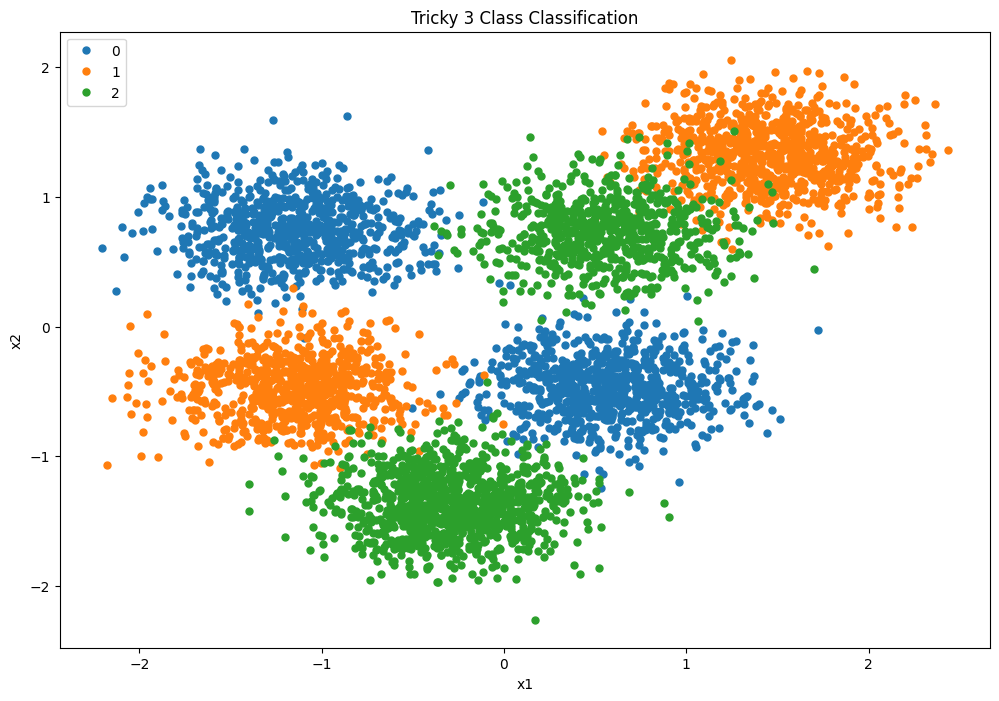

In [ ]:
plot_data(X, y)

Now build your network. Good luck! 😉

#a)

You are given two dimensional input from three separate classes. Your task is to implement a multi-layer perceptron (MLP) 3-class classifier with multiple hidden layers and a regularization on the weights. For the activiation function of the hidden units use ReLU or leaky ReLU. For the predictions use softmax on a linear output layer as we did in class. Your loss layer should compute  −log𝑃(𝑦=𝑖|𝐱)  where  𝑖  is the correct label according to the training data.

Implement each layer type (hidden, output, and loss) as separate python classes, each with methods for initialization, forward propagation, and backpropagation.

Implement a MLP as its own class, with separate methods for initialization, adding a layer, forward propagation, backpropagation, training and prediction.

Let the layer dimensions be parameters passed when the network is created.

Let the number of training epochs, the mini-batch size, and the regularization parameter be parameters that are passed when training the network.

Build and run your network using your own constructs. The code for doing this might look like what is shown in the next box below.

In [ ]:
from tqdm import tqdm
import random


class MLP():
  def __init__(self, test_data):
    self.layers = []
    self.test_data = test_data

  def add_layer(self, layer_type: str, in_size: int, out_size: int):
    if layer_type in ("Hidden", "hidden", "H", "h"):
      layer = HiddenLayer(in_size, out_size)
    elif layer_type in ("Output", "output", "O", "o"):
      layer = OutputLayer(in_size, out_size)
    elif layer_type in ("Loss", "loss", "L", "l"):
      layer = LossLayer(in_size, out_size)

    self.layers.append(layer)

  def net_feedforward(self, x):
    z_vals = []
    activation_vals = [x]
    a = np.copy(x)
    for layer in self.layers:
      if layer.layer_type != "L":
        z, a = layer.feedforward(a)
        z_vals.append(np.copy(z))
        activation_vals.append(np.copy(a))
    return((z_vals, activation_vals))

  def net_backprop(self, x, y, z_vals, activation_vals):
    weight_deltas = []
    bias_deltas = []

    layer_input = np.copy(x.reshape(len(x),1))

    # loss layer
    grad_h = self.layers[-1].backprop(z_vals[-1], y) #grad_h is actually grad_z for loss layer

    # other layers
    for idx, layer in reversed(list(enumerate(self.layers[:-1]))):
      grad_weight, grad_bias, grad_h = layer.backprop(activation_vals[idx], np.copy(grad_h), z_vals[idx], y)
      weight_deltas.append(np.copy(grad_weight))
      bias_deltas.append(np.copy(grad_bias))

    return((list(reversed(bias_deltas)), list(reversed(weight_deltas))))

  def process_mini_batch(self, mini_batch, lr, alpha):
    first = True
    loss = 0.0
    for sample in mini_batch:
      x = sample[0].reshape(len(sample[0]),1)
      y = sample[1].reshape(len(sample[1]),1)

      if first:
        weights, activations = self.net_feedforward(x)
        bias_grad, weight_grad = self.net_backprop(x, y, weights, activations)

        loss = self.layers[-1].feedforward(y, weights[-1])
        first = False
      else:
        weights, activations = self.net_feedforward(x)
        t_bias_grad, t_weight_grad = self.net_backprop(x, y, weights, activations)
        loss += self.layers[-1].feedforward(y ,weights[-1])

        for i in range(len(bias_grad)):
          bias_grad[i] = bias_grad[i] + t_bias_grad[i]

        for i in range(len(weight_grad)):
          weight_grad[i] = weight_grad[i] + t_weight_grad[i]

    # print(len(self.layers),len(weight_grad))
    for i in range(len(weight_grad)):
      assert self.layers[i].weights.shape == weight_grad[i].shape, "W shape mismatch"
      self.layers[i].weights = self.layers[i].weights - lr/len(mini_batch)*(weight_grad[i]+alpha*np.abs(self.layers[i].weights))

    for i in range(len(bias_grad)):
      assert self.layers[i].biases.shape == bias_grad[i].shape, "B shape mismatch"

      self.layers[i].biases = self.layers[i].biases - lr/len(mini_batch)*bias_grad[i]
    return(loss/len(mini_batch))

  def train(self, dataset, epochs, lr, batch_size=32, test=False, alpha=0.0):
    n = len(dataset)
    losses = []
    for j in range(epochs):
        print(f"training epoch {j+1}/{epochs}")
        np.random.shuffle(dataset)
        for k in tqdm(range(n // batch_size)):
            mini_batch = dataset[k * batch_size : (k + 1) * batch_size]
            loss = self.process_mini_batch(mini_batch, lr, alpha)
            losses.append(loss)
        if test:
            print(f"Epoch {j+1}: eval accuracy: {self.evaluate(self.test_data)}")
        else:
            print(f"Epoch {j+1} complete")
    return losses

  def evaluate(self, val_data):

    test_results = [
        [np.argmax(self.net_feedforward(x.reshape(len(x),1))[-1][-1]), y[0]] for (x, y) in val_data
    ]
    res = np.array(test_results)
    return(np.sum(res[:,0] == res[:,1])/len(res))

class HiddenLayer():
  def __init__(self, in_size, out_size):
    self.weights = np.random.randn(in_size, out_size)#*np.sqrt(2/in_size)
    self.biases = np.random.randn(out_size, 1)
    self.in_dim = in_size
    self.out_dim= out_size
    self.layer_type = "H"

  def relu(self, x):
    return np.maximum(0,x)

  def leaky_relu(self, x):
    alpha = 0.1
    return np.maximum(alpha*x, x)

  def leaky_relu_prime(self, x):
    x_copy = np.copy(x)
    x_copy[x_copy > 0] = 1.0
    x_copy[x_copy < 0] = 0.1
    return(x_copy)

  def relu_prime(self,x):
    x_copy = np.copy(x)
    x_copy[x_copy > 0] = 1.0
    x_copy[x_copy < 0] = 0.0
    return(x_copy)

  def feedforward(self, x):

    Z = self.weights.T@x+self.biases
    activated_Z = self.relu(Z)

    return((Z, activated_Z))

  def backprop(self, layer_input, grad_h, h, y):
    f = self.relu_prime(h)

    grad_bias = np.multiply(f, grad_h)

    grad_weight = layer_input@(grad_bias.T)

    grad_h_to_pass =  self.weights@grad_h

    return((grad_weight, grad_bias, grad_h_to_pass))


class OutputLayer():
  def __init__(self, in_size, out_size):
    self.weights = np.random.randn(in_size, out_size)# *np.sqrt(2/in_size)
    self.biases = np.random.randn(out_size, 1)
    self.in_dim = in_size
    self.out_dim = out_size
    self.layer_type = "O"

  def relu(self, x):
    return np.maximum(0,x)

  def leaky_relu(self, x):
    alpha = 0.1

    return np.maximum(alpha*x, x)

  def feedforward(self, x: np.array):
    input_copy = np.copy(x)

    Z = self.weights.T@input_copy+self.biases
    activated_Z = np.exp(Z)/np.sum(np.exp(Z)+ 1e-11)
    assert Z.shape == activated_Z.shape, "output layer ff error"

    return((Z, activated_Z))

  def backprop(self, layer_input, grad_z, Z, y):

    grad_weight = layer_input@(grad_z.T)
    grad_bias = np.copy(grad_z)

    grad_h = self.weights@grad_z

    return((grad_weight, grad_bias, grad_h))

class LossLayer():
  def __init__(self, in_size, out_size):
    self.in_dim = in_size
    self.out_dim= out_size
    self.layer_type = "L"

  def feedforward(self, y, z):
    loss = -z[int(y)] + np.log(np.sum(np.exp(z)) + 1e-11)
    return(loss)

  def backprop(self, Z, y):
    y_hot = np.zeros((self.out_dim,1))
    y_hot[int(y)] = 1.0

    grad_Z = -1*y_hot + np.exp(Z)/np.sum(np.exp(Z) + 1e-11)

    return((grad_Z))

In [ ]:
def test_train_split(x_data, y_data, train_fraction = 0.8):
  dataset = [(x,y) for x,y in zip(np.array(x_data), np.array(y_data))]
  np.random.shuffle(dataset)
  split_idx = int(len(dataset)*0.8)
  train_set = dataset[:split_idx]
  test_set = dataset[split_idx:]
  assert len(train_set) + len(test_set) == len(dataset), "lengths of data splits are inconsistent"
  return(train_set,test_set)


In [ ]:
trainset, testset = test_train_split(X,y, 0.8)

training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 203.66it/s]


Epoch 1: eval accuracy: 0.377
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 178.35it/s]


Epoch 2: eval accuracy: 0.376
training epoch 3/40


100%|██████████| 125/125 [00:01<00:00, 100.75it/s]


Epoch 3: eval accuracy: 0.479
training epoch 4/40


100%|██████████| 125/125 [00:01<00:00, 111.27it/s]


Epoch 4: eval accuracy: 0.517
training epoch 5/40


100%|██████████| 125/125 [00:01<00:00, 101.95it/s]


Epoch 5: eval accuracy: 0.626
training epoch 6/40


100%|██████████| 125/125 [00:01<00:00, 83.68it/s]


Epoch 6: eval accuracy: 0.667
training epoch 7/40


100%|██████████| 125/125 [00:03<00:00, 38.88it/s]


Epoch 7: eval accuracy: 0.695
training epoch 8/40


100%|██████████| 125/125 [00:01<00:00, 100.19it/s]


Epoch 8: eval accuracy: 0.713
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 150.55it/s]


Epoch 9: eval accuracy: 0.73
training epoch 10/40


100%|██████████| 125/125 [00:01<00:00, 104.12it/s]


Epoch 10: eval accuracy: 0.741
training epoch 11/40


100%|██████████| 125/125 [00:01<00:00, 105.00it/s]


Epoch 11: eval accuracy: 0.759
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 131.00it/s]


Epoch 12: eval accuracy: 0.774
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 186.01it/s]


Epoch 13: eval accuracy: 0.796
training epoch 14/40


100%|██████████| 125/125 [00:01<00:00, 120.53it/s]


Epoch 14: eval accuracy: 0.808
training epoch 15/40


100%|██████████| 125/125 [00:01<00:00, 66.30it/s]


Epoch 15: eval accuracy: 0.829
training epoch 16/40


100%|██████████| 125/125 [00:02<00:00, 58.36it/s]


Epoch 16: eval accuracy: 0.843
training epoch 17/40


100%|██████████| 125/125 [00:01<00:00, 122.89it/s]


Epoch 17: eval accuracy: 0.855
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 213.08it/s]


Epoch 18: eval accuracy: 0.862
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 183.73it/s]


Epoch 19: eval accuracy: 0.865
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 177.98it/s]


Epoch 20: eval accuracy: 0.873
training epoch 21/40


100%|██████████| 125/125 [00:01<00:00, 81.21it/s]


Epoch 21: eval accuracy: 0.886
training epoch 22/40


100%|██████████| 125/125 [00:01<00:00, 62.90it/s]


Epoch 22: eval accuracy: 0.889
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 166.26it/s]


Epoch 23: eval accuracy: 0.893
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 211.34it/s]


Epoch 24: eval accuracy: 0.896
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 211.76it/s]


Epoch 25: eval accuracy: 0.898
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 205.33it/s]


Epoch 26: eval accuracy: 0.906
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 165.11it/s]


Epoch 27: eval accuracy: 0.91
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 126.22it/s]


Epoch 28: eval accuracy: 0.912
training epoch 29/40


100%|██████████| 125/125 [00:01<00:00, 122.16it/s]


Epoch 29: eval accuracy: 0.916
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 190.00it/s]


Epoch 30: eval accuracy: 0.916
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 204.66it/s]


Epoch 31: eval accuracy: 0.917
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 211.14it/s]


Epoch 32: eval accuracy: 0.919
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 216.06it/s]


Epoch 33: eval accuracy: 0.922
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 215.54it/s]


Epoch 34: eval accuracy: 0.923
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 218.08it/s]


Epoch 35: eval accuracy: 0.923
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 210.98it/s]


Epoch 36: eval accuracy: 0.925
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 211.99it/s]


Epoch 37: eval accuracy: 0.925
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 212.08it/s]


Epoch 38: eval accuracy: 0.926
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 210.83it/s]


Epoch 39: eval accuracy: 0.926
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 210.01it/s]


Epoch 40: eval accuracy: 0.93


Text(0.5, 1.0, 'Training Loss')

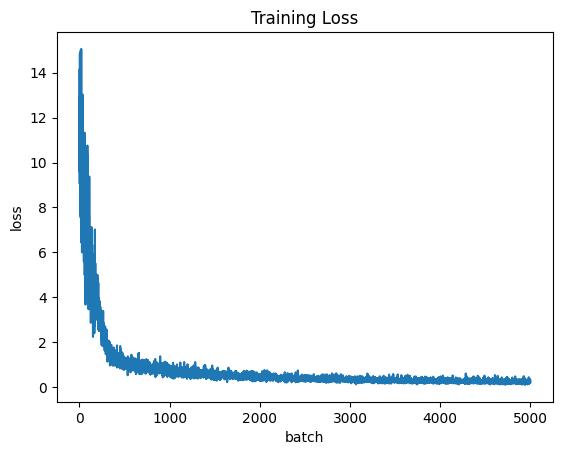

In [ ]:
NN = MLP(testset)
NN.add_layer('Hidden', in_size=2, out_size=16)
NN.add_layer('Hidden', in_size=16, out_size=16)
NN.add_layer('Output', in_size=16, out_size=3)
NN.add_layer('Loss', in_size=3, out_size=3)



loss = NN.train(trainset, epochs=40, lr=0.0005, batch_size=32, test=True,alpha=0.0)
plt.plot(np.array(loss).flatten())
plt.xlabel("batch")
plt.ylabel("loss")
plt.title("Training Loss")

#b)
Show the decision regions of the trained classifier by densely generating points in the plane and color coding these points with the three different labels.

In [ ]:
def check_decision_boundary(trained_net):
  points = np.random.uniform(-2,2,(75000,2))

  d = np.argmax(np.array([trained_net.net_feedforward(p.reshape(2,1))[-1][-1] for p in points]),axis=1).flatten()
  scatter = plt.scatter(points[:,0], points[:,1], c=d, s=4)
  plt.legend(handles=scatter.legend_elements()[0], labels=["0","1","2"])

  plt.title(" MLP Decision Boundary")
  return(d)

array([2, 2, 2, ..., 1, 2, 1])

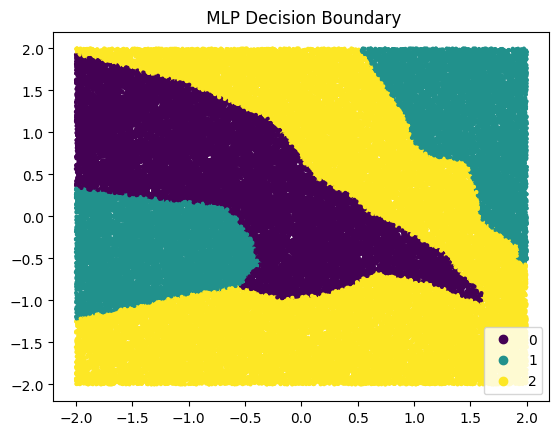

In [ ]:
check_decision_boundary(NN)

#c)
Repeat varying the number of hidden units (3, 8, 16), the number of hidden layers (1 and 3), and the regularization value (0 and some other value of your choosing).

## no regularization, 1 hidden layer

training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 268.76it/s]


Epoch 1: eval accuracy: 0.323
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 271.99it/s]


Epoch 2: eval accuracy: 0.323
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 276.47it/s]


Epoch 3: eval accuracy: 0.323
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 276.75it/s]


Epoch 4: eval accuracy: 0.323
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 280.67it/s]


Epoch 5: eval accuracy: 0.323
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 281.90it/s]


Epoch 6: eval accuracy: 0.323
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 270.03it/s]


Epoch 7: eval accuracy: 0.323
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 274.94it/s]


Epoch 8: eval accuracy: 0.323
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 284.42it/s]


Epoch 9: eval accuracy: 0.323
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 283.54it/s]


Epoch 10: eval accuracy: 0.323
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 279.15it/s]


Epoch 11: eval accuracy: 0.323
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 160.74it/s]


Epoch 12: eval accuracy: 0.323
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 165.95it/s]


Epoch 13: eval accuracy: 0.323
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 164.44it/s]


Epoch 14: eval accuracy: 0.323
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 178.79it/s]


Epoch 15: eval accuracy: 0.323
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 291.47it/s]


Epoch 16: eval accuracy: 0.323
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 282.11it/s]


Epoch 17: eval accuracy: 0.323
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 284.43it/s]


Epoch 18: eval accuracy: 0.323
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 287.78it/s]


Epoch 19: eval accuracy: 0.323
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 284.14it/s]


Epoch 20: eval accuracy: 0.323
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 280.66it/s]


Epoch 21: eval accuracy: 0.323
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 288.57it/s]


Epoch 22: eval accuracy: 0.323
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 280.50it/s]


Epoch 23: eval accuracy: 0.323
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 281.49it/s]


Epoch 24: eval accuracy: 0.333
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 273.06it/s]


Epoch 25: eval accuracy: 0.349
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 283.75it/s]


Epoch 26: eval accuracy: 0.359
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 276.62it/s]


Epoch 27: eval accuracy: 0.371
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 281.97it/s]


Epoch 28: eval accuracy: 0.38
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 273.88it/s]


Epoch 29: eval accuracy: 0.385
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 272.68it/s]


Epoch 30: eval accuracy: 0.389
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 273.59it/s]


Epoch 31: eval accuracy: 0.392
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 274.01it/s]


Epoch 32: eval accuracy: 0.396
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 280.14it/s]


Epoch 33: eval accuracy: 0.397
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 276.14it/s]


Epoch 34: eval accuracy: 0.397
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 236.22it/s]


Epoch 35: eval accuracy: 0.396
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 164.79it/s]


Epoch 36: eval accuracy: 0.389
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 166.38it/s]


Epoch 37: eval accuracy: 0.374
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 161.13it/s]


Epoch 38: eval accuracy: 0.337
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 214.16it/s]


Epoch 39: eval accuracy: 0.292
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 274.51it/s]


Epoch 40: eval accuracy: 0.267
training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 282.53it/s]


Epoch 1: eval accuracy: 0.376
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 281.49it/s]


Epoch 2: eval accuracy: 0.375
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 272.66it/s]


Epoch 3: eval accuracy: 0.371
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 270.67it/s]


Epoch 4: eval accuracy: 0.363
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 280.03it/s]


Epoch 5: eval accuracy: 0.36
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 279.42it/s]


Epoch 6: eval accuracy: 0.354
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 266.06it/s]


Epoch 7: eval accuracy: 0.35
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 284.98it/s]


Epoch 8: eval accuracy: 0.335
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 255.26it/s]


Epoch 9: eval accuracy: 0.31
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 284.52it/s]


Epoch 10: eval accuracy: 0.294
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 268.91it/s]


Epoch 11: eval accuracy: 0.284
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 281.12it/s]


Epoch 12: eval accuracy: 0.281
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 258.13it/s]


Epoch 13: eval accuracy: 0.282
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 185.81it/s]


Epoch 14: eval accuracy: 0.282
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 163.55it/s]


Epoch 15: eval accuracy: 0.284
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 158.79it/s]


Epoch 16: eval accuracy: 0.284
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 159.54it/s]


Epoch 17: eval accuracy: 0.283
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 133.71it/s]


Epoch 18: eval accuracy: 0.287
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 267.20it/s]


Epoch 19: eval accuracy: 0.297
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 239.77it/s]


Epoch 20: eval accuracy: 0.308
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 254.90it/s]


Epoch 21: eval accuracy: 0.325
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 272.70it/s]


Epoch 22: eval accuracy: 0.342
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 244.13it/s]


Epoch 23: eval accuracy: 0.375
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 160.44it/s]


Epoch 24: eval accuracy: 0.403
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 161.56it/s]


Epoch 25: eval accuracy: 0.423
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 152.43it/s]


Epoch 26: eval accuracy: 0.443
training epoch 27/40


100%|██████████| 125/125 [00:01<00:00, 103.95it/s]


Epoch 27: eval accuracy: 0.462
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 275.74it/s]


Epoch 28: eval accuracy: 0.473
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 276.78it/s]


Epoch 29: eval accuracy: 0.49
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 266.94it/s]


Epoch 30: eval accuracy: 0.501
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 273.11it/s]


Epoch 31: eval accuracy: 0.505
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 182.06it/s]


Epoch 32: eval accuracy: 0.507
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 163.20it/s]


Epoch 33: eval accuracy: 0.513
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 159.86it/s]


Epoch 34: eval accuracy: 0.525
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 158.82it/s]


Epoch 35: eval accuracy: 0.535
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 276.19it/s]


Epoch 36: eval accuracy: 0.548
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 259.13it/s]


Epoch 37: eval accuracy: 0.557
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 244.29it/s]


Epoch 38: eval accuracy: 0.562
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 265.19it/s]


Epoch 39: eval accuracy: 0.57
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 274.21it/s]


Epoch 40: eval accuracy: 0.575
training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 280.93it/s]


Epoch 1: eval accuracy: 0.26
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 276.95it/s]


Epoch 2: eval accuracy: 0.284
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 274.17it/s]


Epoch 3: eval accuracy: 0.302
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 274.67it/s]


Epoch 4: eval accuracy: 0.322
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 268.85it/s]


Epoch 5: eval accuracy: 0.34
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 279.44it/s]


Epoch 6: eval accuracy: 0.359
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 274.89it/s]


Epoch 7: eval accuracy: 0.377
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 269.86it/s]


Epoch 8: eval accuracy: 0.384
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 276.22it/s]


Epoch 9: eval accuracy: 0.396
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 267.35it/s]


Epoch 10: eval accuracy: 0.409
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 160.38it/s]


Epoch 11: eval accuracy: 0.419
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 152.23it/s]


Epoch 12: eval accuracy: 0.434
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 155.86it/s]


Epoch 13: eval accuracy: 0.449
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 201.89it/s]


Epoch 14: eval accuracy: 0.455
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 268.41it/s]


Epoch 15: eval accuracy: 0.46
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 241.04it/s]


Epoch 16: eval accuracy: 0.478
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 281.41it/s]


Epoch 17: eval accuracy: 0.563
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 279.70it/s]


Epoch 18: eval accuracy: 0.598
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 270.80it/s]


Epoch 19: eval accuracy: 0.613
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 274.98it/s]


Epoch 20: eval accuracy: 0.624
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 272.56it/s]


Epoch 21: eval accuracy: 0.639
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 278.08it/s]


Epoch 22: eval accuracy: 0.647
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 272.69it/s]


Epoch 23: eval accuracy: 0.659
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 267.90it/s]


Epoch 24: eval accuracy: 0.67
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 257.28it/s]


Epoch 25: eval accuracy: 0.674
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 278.81it/s]


Epoch 26: eval accuracy: 0.676
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 269.50it/s]


Epoch 27: eval accuracy: 0.68
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 277.74it/s]


Epoch 28: eval accuracy: 0.689
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 274.52it/s]


Epoch 29: eval accuracy: 0.691
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 274.90it/s]


Epoch 30: eval accuracy: 0.694
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 276.88it/s]


Epoch 31: eval accuracy: 0.703
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 282.86it/s]


Epoch 32: eval accuracy: 0.705
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 261.24it/s]


Epoch 33: eval accuracy: 0.709
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 162.67it/s]


Epoch 34: eval accuracy: 0.711
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 166.46it/s]


Epoch 35: eval accuracy: 0.715
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 166.11it/s]


Epoch 36: eval accuracy: 0.719
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 161.00it/s]


Epoch 37: eval accuracy: 0.723
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 271.81it/s]


Epoch 38: eval accuracy: 0.727
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 264.63it/s]


Epoch 39: eval accuracy: 0.73
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 280.48it/s]


Epoch 40: eval accuracy: 0.732


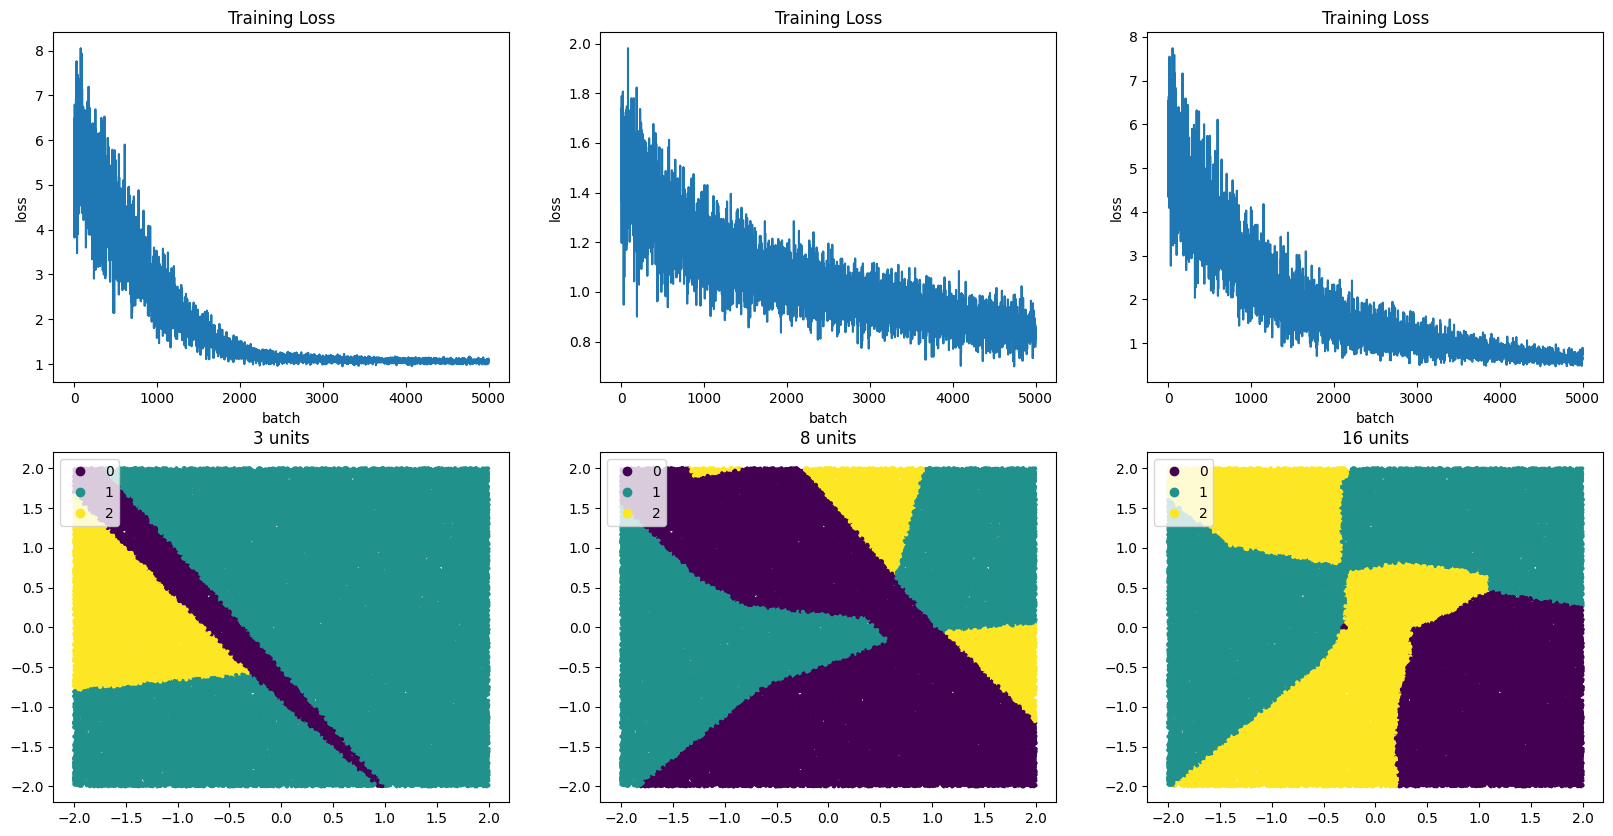

In [ ]:
NN1 = MLP(testset)
NN1.add_layer('Hidden', in_size=2, out_size=3)
NN1.add_layer('Output', in_size=3, out_size=3)
NN1.add_layer('Loss', in_size=3, out_size=3)

NN2 = MLP(testset)
NN2.add_layer('Hidden', in_size=2, out_size=8)
NN2.add_layer('Output', in_size=8, out_size=3)
NN2.add_layer('Loss', in_size=3, out_size=3)

NN3 = MLP(testset)
NN3.add_layer('Hidden', in_size=2, out_size=16)
NN3.add_layer('Output', in_size=16, out_size=3)
NN3.add_layer('Loss', in_size=3, out_size=3)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

points = np.random.uniform(-2,2,(75000,2))
title_strs = {0:"3 units", 1: "8 units", 2: "16 units"}

for idx,network in enumerate([NN1, NN2, NN3]):
  loss = network.train(trainset, epochs=40, lr=0.0005, batch_size=32, test=True,alpha=0.0)
  axs[0,idx].plot(np.array(loss).flatten())
  axs[0,idx].set_xlabel("batch")
  axs[0,idx].set_ylabel("loss")
  axs[0,idx].set_title("Training Loss")

  d = np.argmax(np.array([network.net_feedforward(p.reshape(2,1))[-1][-1] for p in points]),axis=1).flatten()
  scatter = axs[1,idx].scatter(points[:,0], points[:,1], c=d, s=4)
  axs[1,idx].legend(handles=scatter.legend_elements()[0], labels=["0","1","2"])

  axs[1,idx].set_title(title_strs[idx])



## no regularization, 3 hidden layers

training epoch 1/40


100%|██████████| 125/125 [00:01<00:00, 105.09it/s]


Epoch 1: eval accuracy: 0.493
training epoch 2/40


100%|██████████| 125/125 [00:01<00:00, 105.04it/s]


Epoch 2: eval accuracy: 0.489
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 151.74it/s]


Epoch 3: eval accuracy: 0.492
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 183.50it/s]


Epoch 4: eval accuracy: 0.493
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 174.56it/s]


Epoch 5: eval accuracy: 0.481
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 178.00it/s]


Epoch 6: eval accuracy: 0.469
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 191.23it/s]


Epoch 7: eval accuracy: 0.462
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 184.65it/s]


Epoch 8: eval accuracy: 0.452
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 177.39it/s]


Epoch 9: eval accuracy: 0.447
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 184.88it/s]


Epoch 10: eval accuracy: 0.44
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 183.02it/s]


Epoch 11: eval accuracy: 0.434
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 181.36it/s]


Epoch 12: eval accuracy: 0.427
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 181.32it/s]


Epoch 13: eval accuracy: 0.423
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 184.91it/s]


Epoch 14: eval accuracy: 0.415
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 181.93it/s]


Epoch 15: eval accuracy: 0.408
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 130.43it/s]


Epoch 16: eval accuracy: 0.406
training epoch 17/40


100%|██████████| 125/125 [00:01<00:00, 101.11it/s]


Epoch 17: eval accuracy: 0.402
training epoch 18/40


100%|██████████| 125/125 [00:01<00:00, 117.29it/s]


Epoch 18: eval accuracy: 0.399
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 187.61it/s]


Epoch 19: eval accuracy: 0.399
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 179.76it/s]


Epoch 20: eval accuracy: 0.401
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 179.39it/s]


Epoch 21: eval accuracy: 0.459
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 188.89it/s]


Epoch 22: eval accuracy: 0.476
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 181.74it/s]


Epoch 23: eval accuracy: 0.486
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 176.51it/s]


Epoch 24: eval accuracy: 0.494
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 180.84it/s]


Epoch 25: eval accuracy: 0.497
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 181.39it/s]


Epoch 26: eval accuracy: 0.502
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 177.15it/s]


Epoch 27: eval accuracy: 0.508
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 178.82it/s]


Epoch 28: eval accuracy: 0.512
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 178.82it/s]


Epoch 29: eval accuracy: 0.512
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 184.62it/s]


Epoch 30: eval accuracy: 0.514
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 171.64it/s]


Epoch 31: eval accuracy: 0.515
training epoch 32/40


100%|██████████| 125/125 [00:01<00:00, 105.62it/s]


Epoch 32: eval accuracy: 0.519
training epoch 33/40


100%|██████████| 125/125 [00:01<00:00, 102.94it/s]


Epoch 33: eval accuracy: 0.519
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 158.62it/s]


Epoch 34: eval accuracy: 0.521
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 183.10it/s]


Epoch 35: eval accuracy: 0.524
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 185.09it/s]


Epoch 36: eval accuracy: 0.526
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 182.37it/s]


Epoch 37: eval accuracy: 0.527
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 178.72it/s]


Epoch 38: eval accuracy: 0.527
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 184.48it/s]


Epoch 39: eval accuracy: 0.527
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 182.45it/s]


Epoch 40: eval accuracy: 0.53
training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 182.01it/s]


Epoch 1: eval accuracy: 0.298
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 142.35it/s]


Epoch 2: eval accuracy: 0.239
training epoch 3/40


100%|██████████| 125/125 [00:01<00:00, 102.20it/s]


Epoch 3: eval accuracy: 0.331
training epoch 4/40


100%|██████████| 125/125 [00:01<00:00, 104.89it/s]


Epoch 4: eval accuracy: 0.404
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 180.48it/s]


Epoch 5: eval accuracy: 0.401
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 180.92it/s]


Epoch 6: eval accuracy: 0.383
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 176.41it/s]


Epoch 7: eval accuracy: 0.393
training epoch 8/40


100%|██████████| 125/125 [00:01<00:00, 113.48it/s]


Epoch 8: eval accuracy: 0.402
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 174.33it/s]


Epoch 9: eval accuracy: 0.424
training epoch 10/40


100%|██████████| 125/125 [00:01<00:00, 102.99it/s]


Epoch 10: eval accuracy: 0.427
training epoch 11/40


100%|██████████| 125/125 [00:01<00:00, 103.04it/s]


Epoch 11: eval accuracy: 0.421
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 163.24it/s]


Epoch 12: eval accuracy: 0.42
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 178.95it/s]


Epoch 13: eval accuracy: 0.403
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 183.68it/s]


Epoch 14: eval accuracy: 0.391
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 144.61it/s]


Epoch 15: eval accuracy: 0.401
training epoch 16/40


100%|██████████| 125/125 [00:01<00:00, 101.75it/s]


Epoch 16: eval accuracy: 0.413
training epoch 17/40


100%|██████████| 125/125 [00:01<00:00, 110.78it/s]


Epoch 17: eval accuracy: 0.445
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 176.94it/s]


Epoch 18: eval accuracy: 0.461
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 178.30it/s]


Epoch 19: eval accuracy: 0.496
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 184.65it/s]


Epoch 20: eval accuracy: 0.552
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 181.20it/s]


Epoch 21: eval accuracy: 0.596
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 180.17it/s]


Epoch 22: eval accuracy: 0.652
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 159.36it/s]


Epoch 23: eval accuracy: 0.68
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 179.09it/s]


Epoch 24: eval accuracy: 0.697
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 177.28it/s]


Epoch 25: eval accuracy: 0.715
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 178.24it/s]


Epoch 26: eval accuracy: 0.733
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 185.03it/s]


Epoch 27: eval accuracy: 0.752
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 186.71it/s]


Epoch 28: eval accuracy: 0.775
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 177.80it/s]


Epoch 29: eval accuracy: 0.811
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 151.61it/s]


Epoch 30: eval accuracy: 0.843
training epoch 31/40


100%|██████████| 125/125 [00:01<00:00, 100.90it/s]


Epoch 31: eval accuracy: 0.874
training epoch 32/40


100%|██████████| 125/125 [00:01<00:00, 99.95it/s]


Epoch 32: eval accuracy: 0.896
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 181.52it/s]


Epoch 33: eval accuracy: 0.903
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 175.78it/s]


Epoch 34: eval accuracy: 0.908
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 178.91it/s]


Epoch 35: eval accuracy: 0.911
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 178.66it/s]


Epoch 36: eval accuracy: 0.914
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 183.02it/s]


Epoch 37: eval accuracy: 0.917
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 183.53it/s]


Epoch 38: eval accuracy: 0.918
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 175.64it/s]


Epoch 39: eval accuracy: 0.919
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 177.52it/s]


Epoch 40: eval accuracy: 0.92
training epoch 1/40


100%|██████████| 125/125 [00:01<00:00, 113.66it/s]


Epoch 1: eval accuracy: 0.873
training epoch 2/40


100%|██████████| 125/125 [00:01<00:00, 97.94it/s] 


Epoch 2: eval accuracy: 0.92
training epoch 3/40


100%|██████████| 125/125 [00:01<00:00, 123.41it/s]


Epoch 3: eval accuracy: 0.935
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 165.83it/s]


Epoch 4: eval accuracy: 0.942
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 171.15it/s]


Epoch 5: eval accuracy: 0.943
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 172.07it/s]


Epoch 6: eval accuracy: 0.946
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 171.23it/s]


Epoch 7: eval accuracy: 0.947
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 174.51it/s]


Epoch 8: eval accuracy: 0.948
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 171.20it/s]


Epoch 9: eval accuracy: 0.948
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 167.94it/s]


Epoch 10: eval accuracy: 0.949
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 174.82it/s]


Epoch 11: eval accuracy: 0.949
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 180.12it/s]


Epoch 12: eval accuracy: 0.951
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 168.85it/s]


Epoch 13: eval accuracy: 0.953
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 170.51it/s]


Epoch 14: eval accuracy: 0.959
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 165.85it/s]


Epoch 15: eval accuracy: 0.958
training epoch 16/40


100%|██████████| 125/125 [00:01<00:00, 91.72it/s] 


Epoch 16: eval accuracy: 0.958
training epoch 17/40


100%|██████████| 125/125 [00:01<00:00, 101.83it/s]


Epoch 17: eval accuracy: 0.958
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 166.92it/s]


Epoch 18: eval accuracy: 0.955
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 171.92it/s]


Epoch 19: eval accuracy: 0.961
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 175.38it/s]


Epoch 20: eval accuracy: 0.962
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 175.81it/s]


Epoch 21: eval accuracy: 0.96
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 174.06it/s]


Epoch 22: eval accuracy: 0.963
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 172.46it/s]


Epoch 23: eval accuracy: 0.962
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 172.01it/s]


Epoch 24: eval accuracy: 0.959
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 168.72it/s]


Epoch 25: eval accuracy: 0.962
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 175.70it/s]


Epoch 26: eval accuracy: 0.965
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 174.84it/s]


Epoch 27: eval accuracy: 0.96
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 168.77it/s]


Epoch 28: eval accuracy: 0.965
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 172.43it/s]


Epoch 29: eval accuracy: 0.964
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 148.99it/s]


Epoch 30: eval accuracy: 0.965
training epoch 31/40


100%|██████████| 125/125 [00:01<00:00, 98.15it/s]


Epoch 31: eval accuracy: 0.965
training epoch 32/40


100%|██████████| 125/125 [00:01<00:00, 101.78it/s]


Epoch 32: eval accuracy: 0.965
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 172.95it/s]


Epoch 33: eval accuracy: 0.965
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 176.95it/s]


Epoch 34: eval accuracy: 0.966
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 171.11it/s]


Epoch 35: eval accuracy: 0.967
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 174.58it/s]


Epoch 36: eval accuracy: 0.966
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 171.96it/s]


Epoch 37: eval accuracy: 0.966
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 162.12it/s]


Epoch 38: eval accuracy: 0.967
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 171.85it/s]


Epoch 39: eval accuracy: 0.966
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 176.45it/s]


Epoch 40: eval accuracy: 0.967


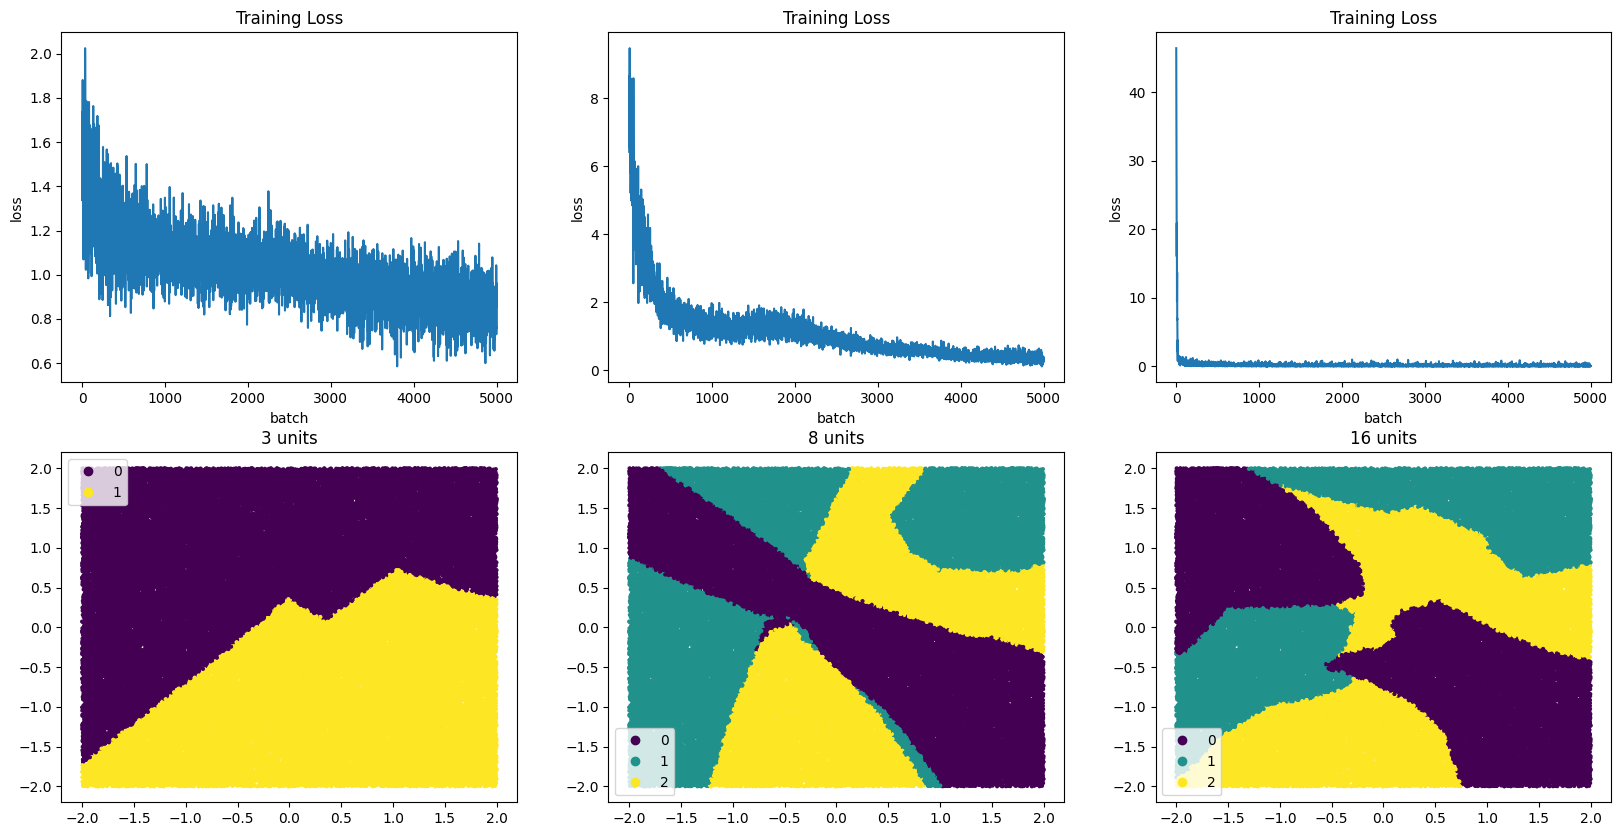

In [ ]:
NN1 = MLP(testset)
NN1.add_layer('Hidden', in_size=2, out_size=3)
NN1.add_layer('Hidden', in_size=3, out_size=3)
NN1.add_layer('Hidden', in_size=3, out_size=3)
NN1.add_layer('Output', in_size=3, out_size=3)
NN1.add_layer('Loss', in_size=3, out_size=3)

NN2 = MLP(testset)
NN2.add_layer('Hidden', in_size=2, out_size=8)
NN2.add_layer('Hidden', in_size=8, out_size=8)
NN2.add_layer('Hidden', in_size=8, out_size=8)
NN2.add_layer('Output', in_size=8, out_size=3)
NN2.add_layer('Loss', in_size=3, out_size=3)

NN3 = MLP(testset)
NN3.add_layer('Hidden', in_size=2, out_size=16)
NN3.add_layer('Hidden', in_size=16, out_size=16)
NN3.add_layer('Hidden', in_size=16, out_size=16)
NN3.add_layer('Output', in_size=16, out_size=3)
NN3.add_layer('Loss', in_size=3, out_size=3)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

points = np.random.uniform(-2,2,(75000,2))
title_strs = {0:"3 units", 1: "8 units", 2: "16 units"}

for idx,network in enumerate([NN1, NN2, NN3]):
  loss = network.train(trainset, epochs=40, lr=0.0005, batch_size=32, test=True,alpha=0.0)
  axs[0,idx].plot(np.array(loss).flatten())
  axs[0,idx].set_xlabel("batch")
  axs[0,idx].set_ylabel("loss")
  axs[0,idx].set_title("Training Loss")

  d = np.argmax(np.array([network.net_feedforward(p.reshape(2,1))[-1][-1] for p in points]),axis=1).flatten()
  scatter = axs[1,idx].scatter(points[:,0], points[:,1], c=d, s=4)
  axs[1,idx].legend(handles=scatter.legend_elements()[0], labels=["0","1","2"])
  axs[1,idx].set_title(title_strs[idx])




## with regularization, 1 hidden layers

training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 276.67it/s]


Epoch 1: eval accuracy: 0.213
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 260.96it/s]


Epoch 2: eval accuracy: 0.204
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 274.34it/s]


Epoch 3: eval accuracy: 0.242
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 277.67it/s]


Epoch 4: eval accuracy: 0.277
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 265.54it/s]


Epoch 5: eval accuracy: 0.328
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 265.52it/s]


Epoch 6: eval accuracy: 0.346
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 260.17it/s]


Epoch 7: eval accuracy: 0.362
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 269.65it/s]


Epoch 8: eval accuracy: 0.363
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 257.42it/s]


Epoch 9: eval accuracy: 0.354
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 285.89it/s]


Epoch 10: eval accuracy: 0.342
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 171.54it/s]


Epoch 11: eval accuracy: 0.332
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 156.57it/s]


Epoch 12: eval accuracy: 0.307
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 159.18it/s]


Epoch 13: eval accuracy: 0.299
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 163.00it/s]


Epoch 14: eval accuracy: 0.292
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 289.64it/s]


Epoch 15: eval accuracy: 0.285
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 271.63it/s]


Epoch 16: eval accuracy: 0.283
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 287.38it/s]


Epoch 17: eval accuracy: 0.283
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 262.85it/s]


Epoch 18: eval accuracy: 0.282
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 290.10it/s]


Epoch 19: eval accuracy: 0.282
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 269.71it/s]


Epoch 20: eval accuracy: 0.278
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 286.72it/s]


Epoch 21: eval accuracy: 0.279
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 269.72it/s]


Epoch 22: eval accuracy: 0.274
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 287.21it/s]


Epoch 23: eval accuracy: 0.275
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 279.16it/s]


Epoch 24: eval accuracy: 0.275
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 276.59it/s]


Epoch 25: eval accuracy: 0.276
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 253.00it/s]


Epoch 26: eval accuracy: 0.276
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 277.36it/s]


Epoch 27: eval accuracy: 0.279
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 264.59it/s]


Epoch 28: eval accuracy: 0.281
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 290.85it/s]


Epoch 29: eval accuracy: 0.292
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 281.40it/s]


Epoch 30: eval accuracy: 0.322
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 275.14it/s]


Epoch 31: eval accuracy: 0.352
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 283.17it/s]


Epoch 32: eval accuracy: 0.382
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 287.63it/s]


Epoch 33: eval accuracy: 0.408
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 190.55it/s]


Epoch 34: eval accuracy: 0.425
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 171.43it/s]


Epoch 35: eval accuracy: 0.429
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 167.52it/s]


Epoch 36: eval accuracy: 0.434
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 167.47it/s]


Epoch 37: eval accuracy: 0.441
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 273.80it/s]


Epoch 38: eval accuracy: 0.445
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 285.94it/s]


Epoch 39: eval accuracy: 0.447
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 277.35it/s]


Epoch 40: eval accuracy: 0.453
training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 284.80it/s]


Epoch 1: eval accuracy: 0.286
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 277.62it/s]


Epoch 2: eval accuracy: 0.29
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 283.05it/s]


Epoch 3: eval accuracy: 0.289
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 263.55it/s]


Epoch 4: eval accuracy: 0.28
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 289.66it/s]


Epoch 5: eval accuracy: 0.273
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 272.10it/s]


Epoch 6: eval accuracy: 0.276
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 284.69it/s]


Epoch 7: eval accuracy: 0.281
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 281.82it/s]


Epoch 8: eval accuracy: 0.292
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 292.13it/s]


Epoch 9: eval accuracy: 0.309
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 274.52it/s]


Epoch 10: eval accuracy: 0.357
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 266.21it/s]


Epoch 11: eval accuracy: 0.392
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 278.96it/s]


Epoch 12: eval accuracy: 0.442
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 215.59it/s]


Epoch 13: eval accuracy: 0.502
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 159.90it/s]


Epoch 14: eval accuracy: 0.525
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 164.25it/s]


Epoch 15: eval accuracy: 0.536
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 166.79it/s]


Epoch 16: eval accuracy: 0.549
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 243.05it/s]


Epoch 17: eval accuracy: 0.559
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 280.49it/s]


Epoch 18: eval accuracy: 0.566
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 282.14it/s]


Epoch 19: eval accuracy: 0.564
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 273.31it/s]


Epoch 20: eval accuracy: 0.565
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 271.28it/s]


Epoch 21: eval accuracy: 0.562
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 269.90it/s]


Epoch 22: eval accuracy: 0.563
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 282.40it/s]


Epoch 23: eval accuracy: 0.561
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 276.02it/s]


Epoch 24: eval accuracy: 0.562
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 274.39it/s]


Epoch 25: eval accuracy: 0.562
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 280.94it/s]


Epoch 26: eval accuracy: 0.562
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 276.32it/s]


Epoch 27: eval accuracy: 0.561
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 274.05it/s]


Epoch 28: eval accuracy: 0.56
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 275.30it/s]


Epoch 29: eval accuracy: 0.561
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 281.69it/s]


Epoch 30: eval accuracy: 0.561
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 277.93it/s]


Epoch 31: eval accuracy: 0.563
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 279.56it/s]


Epoch 32: eval accuracy: 0.562
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 278.72it/s]


Epoch 33: eval accuracy: 0.561
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 279.96it/s]


Epoch 34: eval accuracy: 0.563
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 279.79it/s]


Epoch 35: eval accuracy: 0.57
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 278.51it/s]


Epoch 36: eval accuracy: 0.57
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 167.96it/s]


Epoch 37: eval accuracy: 0.571
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 164.34it/s]


Epoch 38: eval accuracy: 0.575
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 160.54it/s]


Epoch 39: eval accuracy: 0.578
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 184.81it/s]


Epoch 40: eval accuracy: 0.589
training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 303.07it/s]


Epoch 1: eval accuracy: 0.28
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 289.58it/s]


Epoch 2: eval accuracy: 0.255
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 289.09it/s]


Epoch 3: eval accuracy: 0.286
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 289.22it/s]


Epoch 4: eval accuracy: 0.386
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 275.02it/s]


Epoch 5: eval accuracy: 0.46
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 282.06it/s]


Epoch 6: eval accuracy: 0.49
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 282.53it/s]


Epoch 7: eval accuracy: 0.523
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 272.06it/s]


Epoch 8: eval accuracy: 0.54
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 281.78it/s]


Epoch 9: eval accuracy: 0.558
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 284.11it/s]


Epoch 10: eval accuracy: 0.574
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 271.46it/s]


Epoch 11: eval accuracy: 0.588
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 280.74it/s]


Epoch 12: eval accuracy: 0.598
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 287.00it/s]


Epoch 13: eval accuracy: 0.605
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 291.78it/s]


Epoch 14: eval accuracy: 0.615
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 283.22it/s]


Epoch 15: eval accuracy: 0.624
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 173.47it/s]


Epoch 16: eval accuracy: 0.625
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 155.17it/s]


Epoch 17: eval accuracy: 0.631
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 163.46it/s]


Epoch 18: eval accuracy: 0.639
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 191.49it/s]


Epoch 19: eval accuracy: 0.648
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 284.05it/s]


Epoch 20: eval accuracy: 0.65
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 279.16it/s]


Epoch 21: eval accuracy: 0.654
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 294.34it/s]


Epoch 22: eval accuracy: 0.66
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 276.36it/s]


Epoch 23: eval accuracy: 0.661
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 273.77it/s]


Epoch 24: eval accuracy: 0.663
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 256.86it/s]


Epoch 25: eval accuracy: 0.665
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 280.40it/s]


Epoch 26: eval accuracy: 0.667
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 269.50it/s]


Epoch 27: eval accuracy: 0.669
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 280.28it/s]


Epoch 28: eval accuracy: 0.671
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 268.50it/s]


Epoch 29: eval accuracy: 0.672
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 283.76it/s]


Epoch 30: eval accuracy: 0.681
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 274.29it/s]


Epoch 31: eval accuracy: 0.686
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 276.38it/s]


Epoch 32: eval accuracy: 0.691
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 268.63it/s]


Epoch 33: eval accuracy: 0.695
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 275.18it/s]


Epoch 34: eval accuracy: 0.703
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 269.48it/s]


Epoch 35: eval accuracy: 0.71
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 275.80it/s]


Epoch 36: eval accuracy: 0.716
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 276.24it/s]


Epoch 37: eval accuracy: 0.723
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 290.14it/s]


Epoch 38: eval accuracy: 0.733
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 188.34it/s]


Epoch 39: eval accuracy: 0.747
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 162.45it/s]


Epoch 40: eval accuracy: 0.755


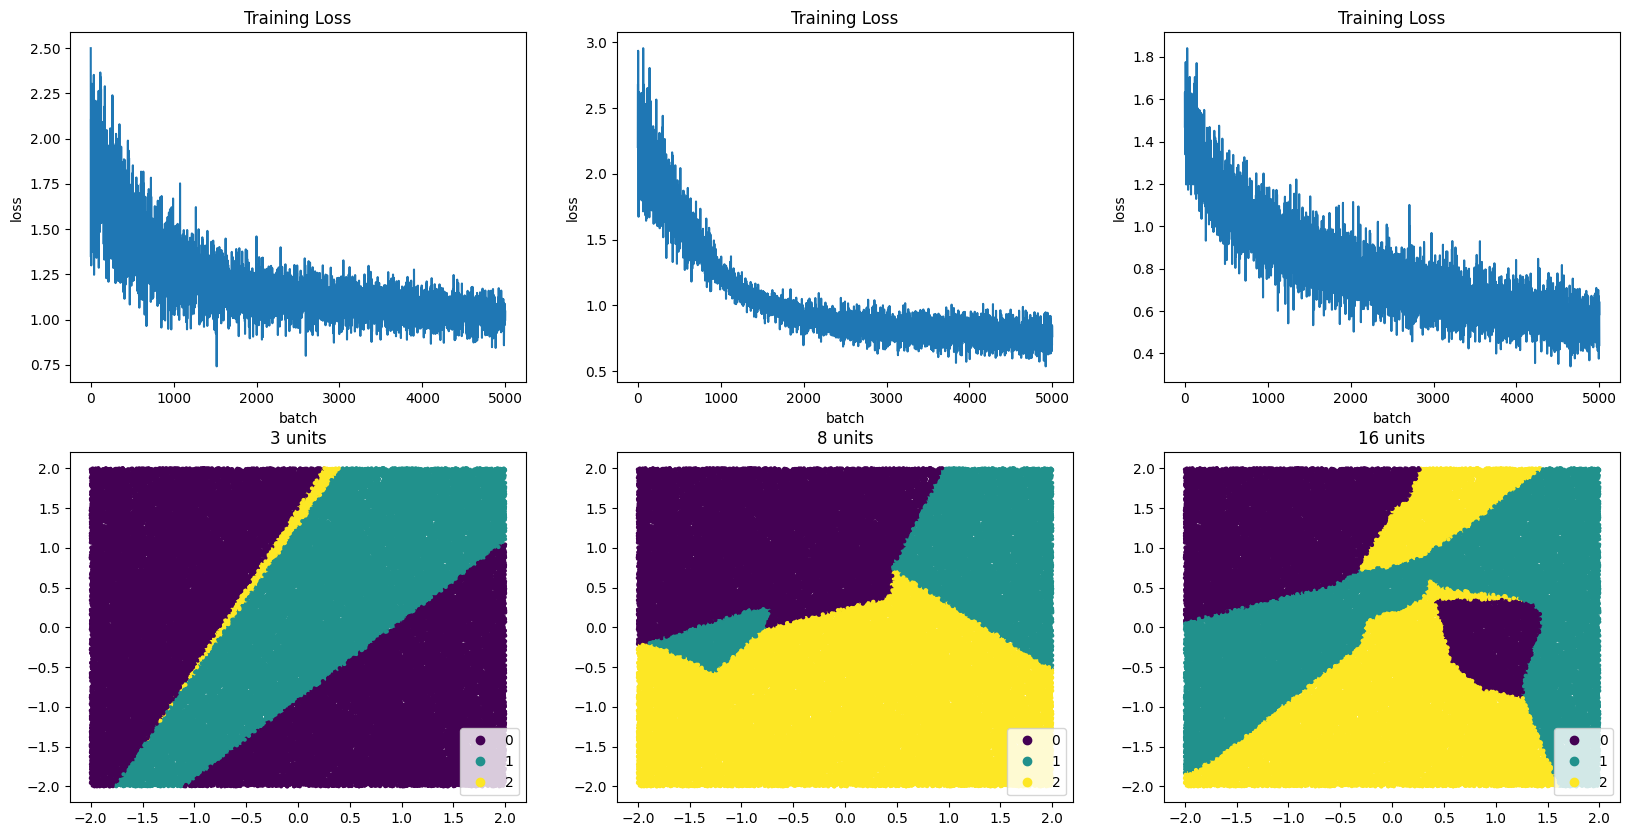

In [ ]:
NN1 = MLP(testset)
NN1.add_layer('Hidden', in_size=2, out_size=3)
NN1.add_layer('Output', in_size=3, out_size=3)
NN1.add_layer('Loss', in_size=3, out_size=3)

NN2 = MLP(testset)
NN2.add_layer('Hidden', in_size=2, out_size=8)
NN2.add_layer('Output', in_size=8, out_size=3)
NN2.add_layer('Loss', in_size=3, out_size=3)

NN3 = MLP(testset)
NN3.add_layer('Hidden', in_size=2, out_size=16)
NN3.add_layer('Output', in_size=16, out_size=3)
NN3.add_layer('Loss', in_size=3, out_size=3)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

points = np.random.uniform(-2,2,(75000,2))
title_strs = {0:"3 units", 1: "8 units", 2: "16 units"}

for idx,network in enumerate([NN1, NN2, NN3]):
  loss = network.train(trainset, epochs=40, lr=0.0005, batch_size=32, test=True,alpha=0.01)
  axs[0,idx].plot(np.array(loss).flatten())
  axs[0,idx].set_xlabel("batch")
  axs[0,idx].set_ylabel("loss")
  axs[0,idx].set_title("Training Loss")

  d = np.argmax(np.array([network.net_feedforward(p.reshape(2,1))[-1][-1] for p in points]),axis=1).flatten()
  scatter = axs[1,idx].scatter(points[:,0], points[:,1], c=d, s=4)
  axs[1,idx].legend(handles=scatter.legend_elements()[0], labels=["0","1","2"])
  axs[1,idx].set_title(title_strs[idx])



# with regularization, 3 hidden layers

training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 190.17it/s]


Epoch 1: eval accuracy: 0.296
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 186.94it/s]


Epoch 2: eval accuracy: 0.296
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 135.71it/s]


Epoch 3: eval accuracy: 0.296
training epoch 4/40


100%|██████████| 125/125 [00:01<00:00, 103.08it/s]


Epoch 4: eval accuracy: 0.296
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 125.53it/s]


Epoch 5: eval accuracy: 0.296
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 188.17it/s]


Epoch 6: eval accuracy: 0.296
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 191.40it/s]


Epoch 7: eval accuracy: 0.296
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 192.95it/s]


Epoch 8: eval accuracy: 0.296
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 190.54it/s]


Epoch 9: eval accuracy: 0.296
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 194.77it/s]


Epoch 10: eval accuracy: 0.296
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 195.48it/s]


Epoch 11: eval accuracy: 0.296
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 195.34it/s]


Epoch 12: eval accuracy: 0.296
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 190.91it/s]


Epoch 13: eval accuracy: 0.296
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 198.44it/s]


Epoch 14: eval accuracy: 0.296
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 186.54it/s]


Epoch 15: eval accuracy: 0.296
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 196.15it/s]


Epoch 16: eval accuracy: 0.296
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 196.81it/s]


Epoch 17: eval accuracy: 0.296
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 198.15it/s]


Epoch 18: eval accuracy: 0.296
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 156.42it/s]


Epoch 19: eval accuracy: 0.296
training epoch 20/40


100%|██████████| 125/125 [00:01<00:00, 102.40it/s]


Epoch 20: eval accuracy: 0.296
training epoch 21/40


100%|██████████| 125/125 [00:01<00:00, 109.46it/s]


Epoch 21: eval accuracy: 0.296
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 192.10it/s]


Epoch 22: eval accuracy: 0.296
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 188.37it/s]


Epoch 23: eval accuracy: 0.296
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 191.70it/s]


Epoch 24: eval accuracy: 0.296
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 194.92it/s]


Epoch 25: eval accuracy: 0.296
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 190.03it/s]


Epoch 26: eval accuracy: 0.296
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 191.03it/s]


Epoch 27: eval accuracy: 0.296
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 194.99it/s]


Epoch 28: eval accuracy: 0.296
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 185.84it/s]


Epoch 29: eval accuracy: 0.296
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 188.00it/s]


Epoch 30: eval accuracy: 0.296
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 182.79it/s]


Epoch 31: eval accuracy: 0.296
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 170.12it/s]


Epoch 32: eval accuracy: 0.296
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 188.14it/s]


Epoch 33: eval accuracy: 0.296
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 180.70it/s]


Epoch 34: eval accuracy: 0.296
training epoch 35/40


100%|██████████| 125/125 [00:01<00:00, 123.78it/s]


Epoch 35: eval accuracy: 0.296
training epoch 36/40


100%|██████████| 125/125 [00:01<00:00, 112.14it/s]


Epoch 36: eval accuracy: 0.296
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 179.71it/s]


Epoch 37: eval accuracy: 0.296
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 187.82it/s]


Epoch 38: eval accuracy: 0.296
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 181.78it/s]


Epoch 39: eval accuracy: 0.296
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 186.06it/s]


Epoch 40: eval accuracy: 0.296
training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 182.38it/s]


Epoch 1: eval accuracy: 0.506
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 177.73it/s]


Epoch 2: eval accuracy: 0.481
training epoch 3/40


100%|██████████| 125/125 [00:00<00:00, 170.63it/s]


Epoch 3: eval accuracy: 0.486
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 179.08it/s]


Epoch 4: eval accuracy: 0.649
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 135.79it/s]


Epoch 5: eval accuracy: 0.643
training epoch 6/40


100%|██████████| 125/125 [00:01<00:00, 98.75it/s]


Epoch 6: eval accuracy: 0.611
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 177.27it/s]


Epoch 7: eval accuracy: 0.602
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 172.62it/s]


Epoch 8: eval accuracy: 0.55
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 172.50it/s]


Epoch 9: eval accuracy: 0.533
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 180.11it/s]


Epoch 10: eval accuracy: 0.576
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 179.97it/s]


Epoch 11: eval accuracy: 0.627
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 172.30it/s]


Epoch 12: eval accuracy: 0.666
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 177.31it/s]


Epoch 13: eval accuracy: 0.681
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 167.40it/s]


Epoch 14: eval accuracy: 0.701
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 178.53it/s]


Epoch 15: eval accuracy: 0.764
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 181.76it/s]


Epoch 16: eval accuracy: 0.803
training epoch 17/40


100%|██████████| 125/125 [00:00<00:00, 171.77it/s]


Epoch 17: eval accuracy: 0.827
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 178.89it/s]


Epoch 18: eval accuracy: 0.847
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 147.79it/s]


Epoch 19: eval accuracy: 0.866
training epoch 20/40


100%|██████████| 125/125 [00:01<00:00, 101.84it/s]


Epoch 20: eval accuracy: 0.886
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 156.51it/s]


Epoch 21: eval accuracy: 0.892
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 179.68it/s]


Epoch 22: eval accuracy: 0.899
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 174.56it/s]


Epoch 23: eval accuracy: 0.908
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 176.99it/s]


Epoch 24: eval accuracy: 0.915
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 172.67it/s]


Epoch 25: eval accuracy: 0.912
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 177.68it/s]


Epoch 26: eval accuracy: 0.922
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 182.53it/s]


Epoch 27: eval accuracy: 0.927
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 184.29it/s]


Epoch 28: eval accuracy: 0.922
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 171.34it/s]


Epoch 29: eval accuracy: 0.924
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 172.43it/s]


Epoch 30: eval accuracy: 0.927
training epoch 31/40


100%|██████████| 125/125 [00:00<00:00, 178.67it/s]


Epoch 31: eval accuracy: 0.927
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 175.38it/s]


Epoch 32: eval accuracy: 0.931
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 166.11it/s]


Epoch 33: eval accuracy: 0.938
training epoch 34/40


100%|██████████| 125/125 [00:01<00:00, 104.47it/s]


Epoch 34: eval accuracy: 0.939
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 133.90it/s]


Epoch 35: eval accuracy: 0.94
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 175.86it/s]


Epoch 36: eval accuracy: 0.937
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 126.67it/s]


Epoch 37: eval accuracy: 0.94
training epoch 38/40


100%|██████████| 125/125 [00:01<00:00, 102.02it/s]


Epoch 38: eval accuracy: 0.94
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 174.91it/s]


Epoch 39: eval accuracy: 0.94
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 182.84it/s]


Epoch 40: eval accuracy: 0.942
training epoch 1/40


100%|██████████| 125/125 [00:00<00:00, 168.77it/s]


Epoch 1: eval accuracy: 0.644
training epoch 2/40


100%|██████████| 125/125 [00:00<00:00, 166.65it/s]


Epoch 2: eval accuracy: 0.729
training epoch 3/40


100%|██████████| 125/125 [00:01<00:00, 100.07it/s]


Epoch 3: eval accuracy: 0.854
training epoch 4/40


100%|██████████| 125/125 [00:00<00:00, 136.75it/s]


Epoch 4: eval accuracy: 0.901
training epoch 5/40


100%|██████████| 125/125 [00:00<00:00, 177.25it/s]


Epoch 5: eval accuracy: 0.914
training epoch 6/40


100%|██████████| 125/125 [00:00<00:00, 177.08it/s]


Epoch 6: eval accuracy: 0.918
training epoch 7/40


100%|██████████| 125/125 [00:00<00:00, 171.16it/s]


Epoch 7: eval accuracy: 0.93
training epoch 8/40


100%|██████████| 125/125 [00:00<00:00, 173.38it/s]


Epoch 8: eval accuracy: 0.935
training epoch 9/40


100%|██████████| 125/125 [00:00<00:00, 180.19it/s]


Epoch 9: eval accuracy: 0.944
training epoch 10/40


100%|██████████| 125/125 [00:00<00:00, 173.30it/s]


Epoch 10: eval accuracy: 0.947
training epoch 11/40


100%|██████████| 125/125 [00:00<00:00, 165.73it/s]


Epoch 11: eval accuracy: 0.943
training epoch 12/40


100%|██████████| 125/125 [00:00<00:00, 173.50it/s]


Epoch 12: eval accuracy: 0.947
training epoch 13/40


100%|██████████| 125/125 [00:00<00:00, 177.45it/s]


Epoch 13: eval accuracy: 0.949
training epoch 14/40


100%|██████████| 125/125 [00:00<00:00, 180.84it/s]


Epoch 14: eval accuracy: 0.948
training epoch 15/40


100%|██████████| 125/125 [00:00<00:00, 168.92it/s]


Epoch 15: eval accuracy: 0.95
training epoch 16/40


100%|██████████| 125/125 [00:00<00:00, 165.42it/s]


Epoch 16: eval accuracy: 0.951
training epoch 17/40


100%|██████████| 125/125 [00:01<00:00, 92.98it/s]


Epoch 17: eval accuracy: 0.951
training epoch 18/40


100%|██████████| 125/125 [00:00<00:00, 140.41it/s]


Epoch 18: eval accuracy: 0.952
training epoch 19/40


100%|██████████| 125/125 [00:00<00:00, 174.66it/s]


Epoch 19: eval accuracy: 0.951
training epoch 20/40


100%|██████████| 125/125 [00:00<00:00, 173.88it/s]


Epoch 20: eval accuracy: 0.952
training epoch 21/40


100%|██████████| 125/125 [00:00<00:00, 168.06it/s]


Epoch 21: eval accuracy: 0.952
training epoch 22/40


100%|██████████| 125/125 [00:00<00:00, 172.31it/s]


Epoch 22: eval accuracy: 0.951
training epoch 23/40


100%|██████████| 125/125 [00:00<00:00, 172.73it/s]


Epoch 23: eval accuracy: 0.954
training epoch 24/40


100%|██████████| 125/125 [00:00<00:00, 167.35it/s]


Epoch 24: eval accuracy: 0.957
training epoch 25/40


100%|██████████| 125/125 [00:00<00:00, 164.87it/s]


Epoch 25: eval accuracy: 0.955
training epoch 26/40


100%|██████████| 125/125 [00:00<00:00, 171.72it/s]


Epoch 26: eval accuracy: 0.952
training epoch 27/40


100%|██████████| 125/125 [00:00<00:00, 175.53it/s]


Epoch 27: eval accuracy: 0.956
training epoch 28/40


100%|██████████| 125/125 [00:00<00:00, 169.17it/s]


Epoch 28: eval accuracy: 0.955
training epoch 29/40


100%|██████████| 125/125 [00:00<00:00, 163.34it/s]


Epoch 29: eval accuracy: 0.957
training epoch 30/40


100%|██████████| 125/125 [00:00<00:00, 146.76it/s]


Epoch 30: eval accuracy: 0.955
training epoch 31/40


100%|██████████| 125/125 [00:01<00:00, 100.19it/s]


Epoch 31: eval accuracy: 0.957
training epoch 32/40


100%|██████████| 125/125 [00:00<00:00, 155.96it/s]


Epoch 32: eval accuracy: 0.952
training epoch 33/40


100%|██████████| 125/125 [00:00<00:00, 175.98it/s]


Epoch 33: eval accuracy: 0.956
training epoch 34/40


100%|██████████| 125/125 [00:00<00:00, 174.43it/s]


Epoch 34: eval accuracy: 0.956
training epoch 35/40


100%|██████████| 125/125 [00:00<00:00, 167.49it/s]


Epoch 35: eval accuracy: 0.957
training epoch 36/40


100%|██████████| 125/125 [00:00<00:00, 175.34it/s]


Epoch 36: eval accuracy: 0.957
training epoch 37/40


100%|██████████| 125/125 [00:00<00:00, 170.19it/s]


Epoch 37: eval accuracy: 0.954
training epoch 38/40


100%|██████████| 125/125 [00:00<00:00, 168.05it/s]


Epoch 38: eval accuracy: 0.958
training epoch 39/40


100%|██████████| 125/125 [00:00<00:00, 172.17it/s]


Epoch 39: eval accuracy: 0.958
training epoch 40/40


100%|██████████| 125/125 [00:00<00:00, 168.74it/s]


Epoch 40: eval accuracy: 0.958


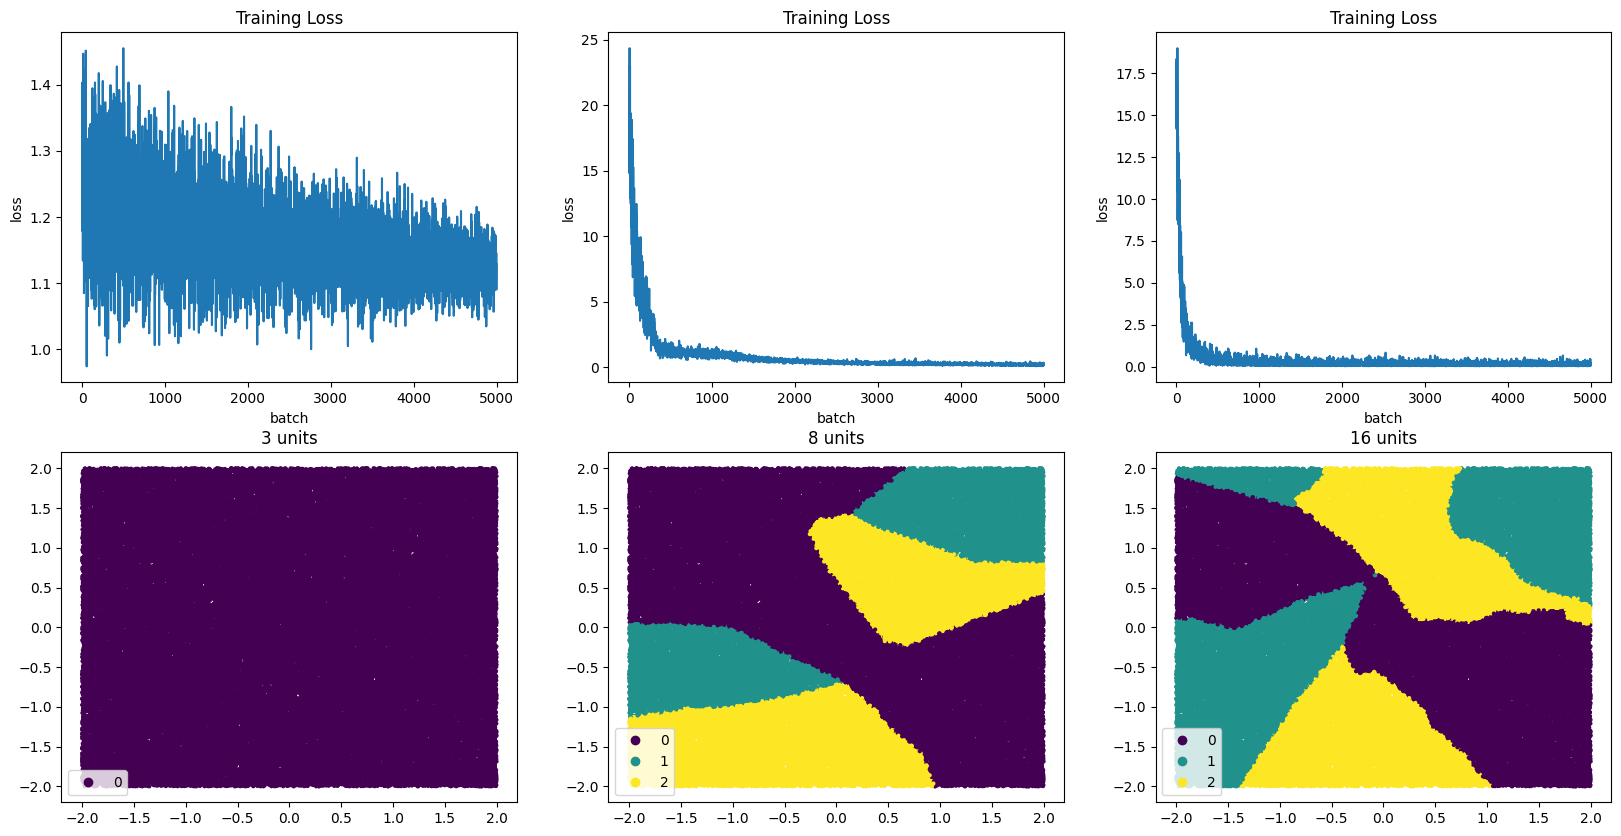

In [ ]:
NN1 = MLP(testset)
NN1.add_layer('Hidden', in_size=2, out_size=3)
NN1.add_layer('Hidden', in_size=3, out_size=3)
NN1.add_layer('Hidden', in_size=3, out_size=3)
NN1.add_layer('Output', in_size=3, out_size=3)
NN1.add_layer('Loss', in_size=3, out_size=3)

NN2 = MLP(testset)
NN2.add_layer('Hidden', in_size=2, out_size=8)
NN2.add_layer('Hidden', in_size=8, out_size=8)
NN2.add_layer('Hidden', in_size=8, out_size=8)
NN2.add_layer('Output', in_size=8, out_size=3)
NN2.add_layer('Loss', in_size=3, out_size=3)

NN3 = MLP(testset)
NN3.add_layer('Hidden', in_size=2, out_size=16)
NN3.add_layer('Hidden', in_size=16, out_size=16)
NN3.add_layer('Hidden', in_size=16, out_size=16)
NN3.add_layer('Output', in_size=16, out_size=3)
NN3.add_layer('Loss', in_size=3, out_size=3)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

points = np.random.uniform(-2,2,(75000,2))
title_strs = {0:"3 units", 1: "8 units", 2: "16 units"}

for idx,network in enumerate([NN1, NN2, NN3]):
  loss = network.train(trainset, epochs=40, lr=0.0005, batch_size=32, test=True,alpha=0.01)
  axs[0,idx].plot(np.array(loss).flatten())
  axs[0,idx].set_xlabel("batch")
  axs[0,idx].set_ylabel("loss")
  axs[0,idx].set_title("Training Loss")

  d = np.argmax(np.array([network.net_feedforward(p.reshape(2,1))[-1][-1] for p in points]),axis=1).flatten()
  scatter = axs[1,idx].scatter(points[:,0], points[:,1], c=d, s=4)
  axs[1,idx].legend(handles=scatter.legend_elements()[0], labels=["0","1","2"])
  axs[1,idx].set_title(title_strs[idx])



#d)
Re-use this same network on any data of your own choosing. You can increase the dimensionality of the features space as you like. You can also change the number of classes to just two or more than three to align with your data. Separate your data into three piles: training, testing, and validation. Use your validation data to decide when to stop training if appropriate. Use your testing set to compute the accuracy of you classfier.

In [ ]:
def test_train_split(x_data, y_data, train_fraction = 0.8):
  dataset = [(x,y) for x,y in zip(np.array(x_data), np.array(y_data))]
  np.random.shuffle(dataset)
  split_idx_tr = int(len(dataset)*0.7)
  split_idx_val = int(len(dataset)*0.8)

  train_set = dataset[:split_idx_tr]
  val_set = dataset[split_idx_tr:split_idx_val]
  test_set = dataset[split_idx_val:]


  assert len(train_set) + len(val_set) + len(test_set)== len(dataset), "lengths of data splits are inconsistent"
  return(train_set,val_set, test_set)

In [ ]:
dataset = pd.read_csv("/content/school_labeled_dataset.csv") #this data can be found here too: https://drive.google.com/file/d/1QQsxAaliI5yTbntf1Gavca_S51iBtay8/view?usp=sharing
dataset.info()
dataset = dataset.filter(["ENROLLMENT","FT_TEACHER","school_type","LATITUDE","LONGITUDE"])
labels = np.copy(dataset['school_type'].to_numpy()).reshape(len(dataset),1)
labels[labels == "PUBLIC"] = 1 # 1 is public 0 is private
labels[labels == "PRIVATE"] = 0
dataset = dataset.filter(["ENROLLMENT","FT_TEACHER","LATITUDE","LONGITUDE"]).to_numpy()
training_data, validation_data, test_data = test_train_split(dataset.astype(float),labels.astype(float),0.8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   500 non-null    int64  
 1   X            500 non-null    float64
 2   Y            500 non-null    float64
 3   NAME         500 non-null    object 
 4   ENROLLMENT   500 non-null    int64  
 5   STATE        500 non-null    object 
 6   END_GRADE    500 non-null    object 
 7   FT_TEACHER   500 non-null    int64  
 8   school_type  500 non-null    object 
 9   LATITUDE     500 non-null    float64
 10  LONGITUDE    500 non-null    float64
 11  START_GRAD   250 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 47.0+ KB


training epoch 1/14


100%|██████████| 10/10 [00:00<00:00, 120.72it/s]


Epoch 1: eval accuracy: 0.5
training epoch 2/14


100%|██████████| 10/10 [00:00<00:00, 201.43it/s]


Epoch 2: eval accuracy: 0.5
training epoch 3/14


100%|██████████| 10/10 [00:00<00:00, 192.47it/s]


Epoch 3: eval accuracy: 0.5
training epoch 4/14


100%|██████████| 10/10 [00:00<00:00, 200.01it/s]


Epoch 4: eval accuracy: 0.5
training epoch 5/14


100%|██████████| 10/10 [00:00<00:00, 159.72it/s]


Epoch 5: eval accuracy: 0.5
training epoch 6/14


100%|██████████| 10/10 [00:00<00:00, 188.21it/s]


Epoch 6: eval accuracy: 0.5
training epoch 7/14


100%|██████████| 10/10 [00:00<00:00, 205.75it/s]


Epoch 7: eval accuracy: 0.5
training epoch 8/14


100%|██████████| 10/10 [00:00<00:00, 174.26it/s]


Epoch 8: eval accuracy: 0.46
training epoch 9/14


100%|██████████| 10/10 [00:00<00:00, 178.10it/s]


Epoch 9: eval accuracy: 0.48
training epoch 10/14


100%|██████████| 10/10 [00:00<00:00, 167.72it/s]


Epoch 10: eval accuracy: 0.48
training epoch 11/14


100%|██████████| 10/10 [00:00<00:00, 153.62it/s]


Epoch 11: eval accuracy: 0.46
training epoch 12/14


100%|██████████| 10/10 [00:00<00:00, 191.33it/s]


Epoch 12: eval accuracy: 0.52
training epoch 13/14


100%|██████████| 10/10 [00:00<00:00, 209.33it/s]


Epoch 13: eval accuracy: 0.56
training epoch 14/14


100%|██████████| 10/10 [00:00<00:00, 187.08it/s]


Epoch 14: eval accuracy: 0.68


Text(0.5, 1.0, 'Training Loss')

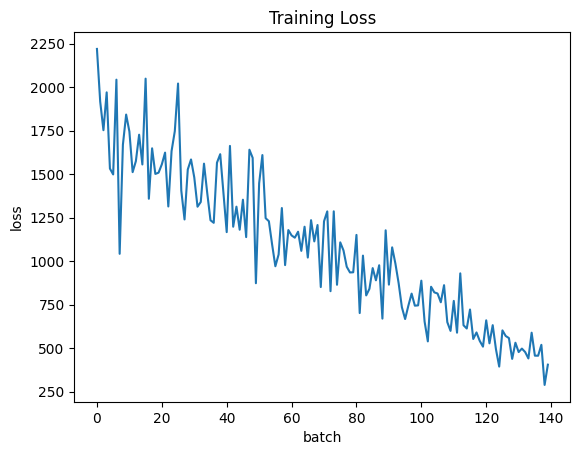

In [ ]:
np.random.seed(0)
NN = MLP(validation_data)
NN.add_layer('Hidden', in_size=4, out_size=16)
NN.add_layer('Hidden', in_size=16, out_size=16)
NN.add_layer('Output', in_size=16, out_size=2)
NN.add_layer('Loss', in_size=2, out_size=2)



loss = NN.train(training_data, epochs=14, lr=0.0000005, batch_size=32, test=True,alpha=0.0)
plt.plot(np.array(loss).flatten())
plt.xlabel("batch")
plt.ylabel("loss")
plt.title("Training Loss")

In [ ]:
print(f'TEST ACCURACY: {NN.evaluate(test_data)*100:.1f}%')

TEST ACCURACY: 76.0%


#e)
Re-do (c) but now build and train your network from scratch using PyTorch. Skip using regularization.

## setup

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

In [ ]:
class MyNet(nn.Module):
  def __init__(self, in_size, out_size, n_hidden_layers, n_hidden_units):
    super(MyNet, self).__init__()
    self.in_size = in_size
    self.out_size = out_size
    self.n_hidden_layers = n_hidden_layers
    self.n_hidden_units = n_hidden_units



    self.layers = nn.ModuleList()
    self.layers.append(nn.Linear(self.in_size, self.n_hidden_units))
    for _ in range(self.n_hidden_layers-1):
      self.layers.append(nn.Linear(self.n_hidden_units,self.n_hidden_units))

    self.layers.append(nn.Linear(self.n_hidden_units,self.out_size))
    self.softmax = nn.Softmax(dim=0)
    self.relu = nn.ReLU()


  def forward(self, x):
    for layer_idx in range(len(self.layers)-1):
      x = self.layers[layer_idx](x)
      x = self.relu(x)
    x = self.layers[-1](x)

    return x

  def inference(self, x):
    for layer_idx in range(len(self.layers)-1):
      x = self.layers[layer_idx](x)
      x = self.relu(x)
    x = self.layers[-1](x)

    x = self.softmax(x)
    return x

class CustomDataset(Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, data_x, data_y):
    'Initialization'
    self.obs = data_x
    self.label = data_y

  def __len__(self):
    'Denotes the total number of samples'
    return len(self.label)

  def __getitem__(self, index):
    'Generates one sample of data'
    X = self.obs[index,:]
    y = self.label[index]

    return X, y

In [ ]:
# Load data
y_train = np.array([i[1] for i in trainset]).astype(int).flatten()
y_test = np.array([i[1] for i in testset]).astype(int).flatten()
train_dataset = CustomDataset(np.array([i[0] for i in trainset]).astype(float), F.one_hot(torch.tensor(y_train),num_classes=3))
test_dataset = CustomDataset(np.array([i[0] for i in testset]).astype(float), F.one_hot(torch.tensor(y_test),num_classes=3))

train_loader = DataLoader(train_dataset,batch_size = 32)
test_loader = DataLoader(test_dataset,batch_size = 32)

In [ ]:
def full_training_loop(network):

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(network.parameters(), lr=0.0005)

  def train_one_epoch():
    running_loss = 0.0
    train_items = 0
    train_correct = 0

    for i, data in enumerate(train_loader):
          X = data[0].float()
          y = data[1].float()
          preds = network.forward(X)
          pred_labels = torch.argmax(preds, axis=0)
          loss = criterion(preds, y.squeeze())
          running_loss +=loss.item()
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          true_preds = network.inference(X)
          train_correct = sum(torch.argmax(true_preds,dim=1) == torch.argmax(y.squeeze(),dim=1))
          train_items = len(y.squeeze())

    train_loss = running_loss/(i+1)
    train_accuracy = train_correct/train_items
    return(train_loss, train_accuracy)

  for epoch in range(40):

      train_loss, train_accuracy = train_one_epoch()


      running_test_loss = 0.0
      test_items = 0
      correct = 0
      with torch.no_grad():
          for i, vdata in enumerate(test_loader):
              vinputs, vlabels = vdata
              voutputs = network.forward(vinputs.float())
              vloss = criterion(voutputs, vlabels.float())
              running_test_loss += vloss
              test_preds = network.inference(vinputs.float())
              correct = sum(torch.argmax(test_preds,dim=1) == torch.argmax(vlabels.float(),dim=1))
              test_items += len(vlabels)

      print('Epoch %d | train loss: %.3f | train acc: %.2f | test loss: %.3f | test acc: %.3f' % (epoch + 1,
                                                                                                  train_loss,
                                                                                                  train_accuracy, running_test_loss/(i+1),correct/len(vlabels)))
  return(network)

## 1 layer

Epoch 1 | train loss: 1.178 | train acc: 0.16 | test loss: 1.151 | test acc: 0.125
Epoch 2 | train loss: 1.117 | train acc: 0.50 | test loss: 1.097 | test acc: 0.875
Epoch 3 | train loss: 1.073 | train acc: 0.66 | test loss: 1.056 | test acc: 0.875
Epoch 4 | train loss: 1.039 | train acc: 0.62 | test loss: 1.025 | test acc: 0.875
Epoch 5 | train loss: 1.012 | train acc: 0.62 | test loss: 1.000 | test acc: 0.875
Epoch 6 | train loss: 0.989 | train acc: 0.62 | test loss: 0.978 | test acc: 0.875
Epoch 7 | train loss: 0.968 | train acc: 0.59 | test loss: 0.959 | test acc: 0.875
Epoch 8 | train loss: 0.949 | train acc: 0.56 | test loss: 0.942 | test acc: 0.875
Epoch 9 | train loss: 0.932 | train acc: 0.59 | test loss: 0.926 | test acc: 0.875
Epoch 10 | train loss: 0.915 | train acc: 0.59 | test loss: 0.912 | test acc: 0.875
Epoch 11 | train loss: 0.900 | train acc: 0.59 | test loss: 0.897 | test acc: 0.875
Epoch 12 | train loss: 0.885 | train acc: 0.59 | test loss: 0.884 | test acc: 0.875
E

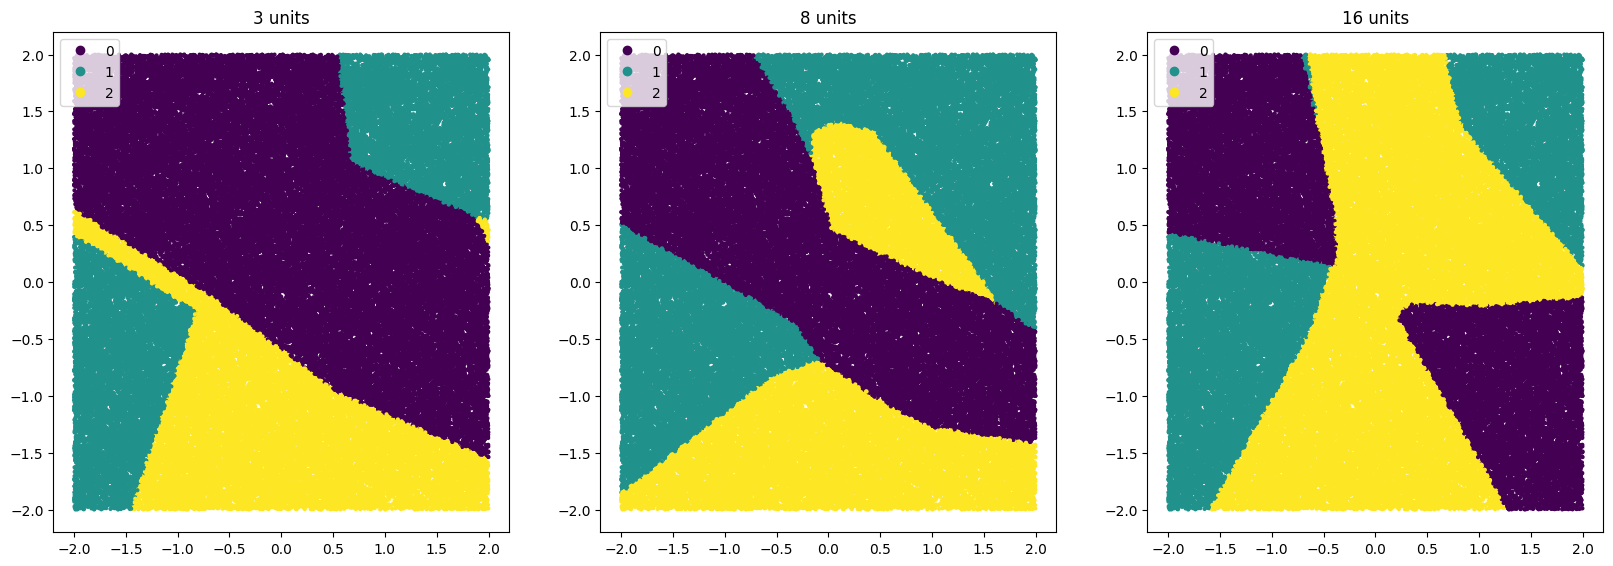

In [ ]:
pyt_NN1 = MyNet(in_size=2, out_size=3,n_hidden_layers=1,n_hidden_units=3)
pyt_NN2 = MyNet(in_size=2, out_size=3,n_hidden_layers=1,n_hidden_units=8)
pyt_NN3 = MyNet(in_size=2, out_size=3,n_hidden_layers=1,n_hidden_units=16)

fig, axs = plt.subplots(1, 3, figsize=(20, 6.5))

points = np.random.uniform(-2,2,(75000,2))
title_strs = {0:"3 units", 1: "8 units", 2: "16 units"}

for idx,network in enumerate([pyt_NN1, pyt_NN2, pyt_NN3]):
  network = full_training_loop(network)

  d = np.array(torch.argmax(network.inference(torch.tensor(points).float()),axis=1))
  scatter = axs[idx].scatter(points[:,0], points[:,1], c=d, s=4)
  axs[idx].legend(handles=scatter.legend_elements()[0], labels=["0","1","2"])
  axs[idx].set_title(title_strs[idx])

# 3 layer

Epoch 1 | train loss: 1.114 | train acc: 0.41 | test loss: 1.084 | test acc: 0.250
Epoch 2 | train loss: 1.064 | train acc: 0.44 | test loss: 1.029 | test acc: 0.250
Epoch 3 | train loss: 1.004 | train acc: 0.59 | test loss: 0.966 | test acc: 0.250
Epoch 4 | train loss: 0.932 | train acc: 0.56 | test loss: 0.893 | test acc: 0.250
Epoch 5 | train loss: 0.855 | train acc: 0.62 | test loss: 0.823 | test acc: 0.250
Epoch 6 | train loss: 0.786 | train acc: 0.62 | test loss: 0.765 | test acc: 0.375
Epoch 7 | train loss: 0.729 | train acc: 0.69 | test loss: 0.719 | test acc: 0.125
Epoch 8 | train loss: 0.684 | train acc: 0.75 | test loss: 0.681 | test acc: 0.125
Epoch 9 | train loss: 0.647 | train acc: 0.75 | test loss: 0.650 | test acc: 0.250
Epoch 10 | train loss: 0.616 | train acc: 0.75 | test loss: 0.622 | test acc: 0.250
Epoch 11 | train loss: 0.590 | train acc: 0.75 | test loss: 0.598 | test acc: 0.250
Epoch 12 | train loss: 0.566 | train acc: 0.72 | test loss: 0.575 | test acc: 0.250
E

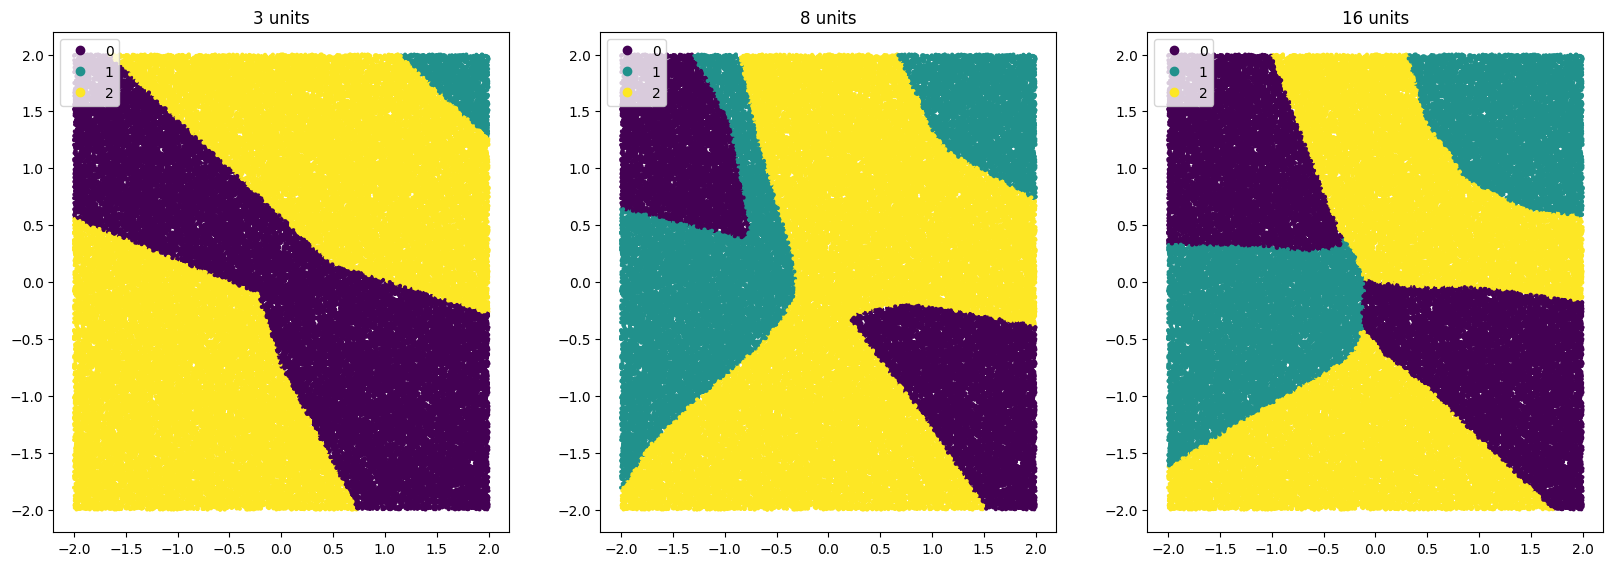

In [ ]:
pyt_NN1 = MyNet(in_size=2, out_size=3,n_hidden_layers=3,n_hidden_units=3)
pyt_NN2 = MyNet(in_size=2, out_size=3,n_hidden_layers=3,n_hidden_units=8)
pyt_NN3 = MyNet(in_size=2, out_size=3,n_hidden_layers=3,n_hidden_units=16)

fig, axs = plt.subplots(1, 3, figsize=(20, 6.5))

points = np.random.uniform(-2,2,(75000,2))
title_strs = {0:"3 units", 1: "8 units", 2: "16 units"}

for idx,network in enumerate([pyt_NN1, pyt_NN2, pyt_NN3]):
  network = full_training_loop(network)

  d = np.array(torch.argmax(network.inference(torch.tensor(points).float()),axis=1))
  scatter = axs[idx].scatter(points[:,0], points[:,1], c=d, s=4)
  axs[idx].legend(handles=scatter.legend_elements()[0], labels=["0","1","2"])
  axs[idx].set_title(title_strs[idx])